<a href="https://colab.research.google.com/github/CamilleKoczorowski/population-gcn/blob/master/FULL_VERSION_Projet_GeometricDATAAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Geometric Data Analysis - (Parisot et al., MICCAI 2017)

## Installation de l'environnement

In [1]:
# Installation des dépendances
!pip install torch_geometric
!pip install nilearn
import os
import torch
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nilearn import datasets, connectome
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

print("Installation terminée.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 90.4 MB/s eta 0:00:00
Installation terminée.


## Récupération des données ABIDE (Moderne)

In [4]:
# 1. Téléchargement des données ABIDE via Nilearn
# On prend un sous-ensemble pour aller vite (n_subjects=100), mets n_subjects=None pour tout le dataset (871 sujets)
#####print("Téléchargement des données ABIDE...")
#####abide = datasets.fetch_abide_pcp(pipeline='cpac', band_pass_filtering=True, global_signal_regression=False, quality_checked=False, n_subjects=None)
#####
###### 2. Préparation des Features (Matrices de connectivité)
###### L'article utilise l'atlas Harvard-Oxford (HO), ici on utilise un atlas par défaut (rois_ho) pour simplifier l'exemple
#####from nilearn.input_data import NiftiLabelsMasker
#####from nilearn import datasets
#####
###### On utilise l'atlas Harvard-Oxford comme dans le papier
#####atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
#####masker = NiftiLabelsMasker(labels_img=atlas.maps, standardize=True, memory='nilearn_cache', verbose=0)
#####
#####correlations = []
#####labels = []      # 1=Autisme (ASD), 2=Control (TC) -> On va convertir en 0/1
#####site_ids = []    # Pour le graphe de population
#####sexes = []       # Pour le graphe de population


## PARTIE SUIVANTE BUG, voir la suite

##print("Calcul des matrices de connectivité (Features)...")
### C'est un peu long la première fois, patience !
##for func_file, pheno in zip(abide.func_preproc, abide.phenotypic):
##    try:
##        time_series = masker.fit_transform(func_file)
##        correlation_matrix = connectome.ConnectivityMeasure(kind='correlation', vectorize=True, discard_diagonal=True).fit_transform([time_series])[0]
##        correlations.append(correlation_matrix)
##        labels.append(pheno['DX_GROUP'])
##        site_ids.append(pheno['SITE_ID'])
##        sexes.append(pheno['SEX'])
##    except Exception as e:
##        print(f"Erreur sur un sujet : {e}")
##
### Conversion en arrays numpy
##X_raw = np.array(correlations)
##y = np.array(labels)
##y = np.where(y == 1, 1, 0) # 1 = ASD, 0 = Control (Le dataset met 1=ASD, 2=Control souvent, vérifions : DX_GROUP 1=Autism, 2=Control)
### Correction : Dans ABIDE, DX_GROUP : 1=Autism, 2=Control. On met 1 pour Autism, 0 pour Control.
##y = (np.array(labels) == 1).astype(int)
##
### 3. Sélection de features (Comme dans le papier : on garde les 2000 meilleures connexions)
##print("Sélection des 2000 meilleures features...")
##selector = SelectKBest(f_classif, k=2000)
##X = selector.fit_transform(X_raw, y)
##
##print(f"Données prêtes : {X.shape[0]} sujets, {X.shape[1]} features.")

Téléchargement des données ABIDE...


[fetch_abide_pcp] Dataset found in /root/nilearn_data/ABIDE_pcp

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
50_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
51_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 113895637 bytes (51.5%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 113895637 bytes (95.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
52_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 102100646 bytes (57.5%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
53_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56098816 of 109794298 bytes (51.1%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
54_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56139776 of 119712830 bytes (46.9%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 119712830 bytes (84.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
55_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 104925592 bytes (64.0%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
56_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63315968 of 114351722 bytes (55.4%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
57_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65232896 of 115752374 bytes (56.4%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
58_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 105165452 bytes (55.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
59_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66920448 of 109601858 bytes (61.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
60_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54566912 of 105561900 bytes (51.7%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 103104512 of 105561900 bytes (97.7%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
02_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66920448 of 122690585 bytes (54.5%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 122690585 bytes (95.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
03_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54411264 of 122083813 bytes (44.6%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 114515968 of 122083813 bytes (93.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
04_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52436992 of 125583987 bytes (41.8%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 107356160 of 125583987 bytes (85.5%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
05_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50167808 of 119568956 bytes (42.0%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 95830016 of 119568956 bytes (80.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
06_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 128766712 bytes (45.6%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 118759424 of 128766712 bytes (92.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
07_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66920448 of 114099393 bytes (58.7%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
09_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50749440 of 118401039 bytes (42.9%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 118401039 bytes (92.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
10_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 131319698 bytes (44.7%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 122224640 of 131319698 bytes (93.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
11_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 47169536 of 129338350 bytes (36.5%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 129338350 bytes (77.8%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
12_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51675136 of 120599516 bytes (42.8%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 120599516 bytes (90.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
13_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 41934848 of 123968197 bytes (33.8%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 97763328 of 123968197 bytes (78.9%%,    0.5s remaining)

[fetch_abide_pcp] Downloaded 115752960 of 123968197 bytes (93.4%%,    0.2s remaining)

[fetch_abide_pcp] Downloaded 116703232 of 123968197 bytes (94.1%%,    0.3s remaining)

[fetch_abide_pcp] Downloaded 123355136 of 123968197 bytes (99.5%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
14_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 47325184 of 122896829 bytes (38.5%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 94429184 of 122896829 bytes (76.8%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
15_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 119948919 bytes (48.9%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 119948919 bytes (97.9%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
16_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 124990867 bytes (47.0%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 119365632 of 124990867 bytes (95.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
17_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 118713768 bytes (49.5%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 118713768 bytes (98.9%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
18_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 48594944 of 121360082 bytes (40.0%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 101408768 of 121360082 bytes (83.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
19_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 113346158 bytes (44.4%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 113346158 bytes (88.8%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
20_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 121143201 bytes (55.4%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
21_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 48431104 of 120975649 bytes (40.0%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 92266496 of 120975649 bytes (76.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
22_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58343424 of 127265768 bytes (45.8%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 113721344 of 127265768 bytes (89.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
23_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 122580689 bytes (47.9%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
24_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 122415705 bytes (48.0%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
25_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 119278188 bytes (49.2%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
26_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 122718748 bytes (41.0%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 103342080 of 122718748 bytes (84.2%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
27_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64823296 of 116124631 bytes (55.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
28_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 122203946 bytes (48.0%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 122203946 bytes (89.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
29_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 125396619 bytes (40.1%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 114860032 of 125396619 bytes (91.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
30_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 118797034 bytes (56.5%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
31_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 117231117 bytes (57.2%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
32_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58531840 of 121654434 bytes (48.1%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 121654434 bytes (89.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
33_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 131350041 bytes (38.3%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 106774528 of 131350041 bytes (81.3%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
34_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 116504439 bytes (50.4%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 116504439 bytes (93.6%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
35_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 123812538 bytes (47.4%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
36_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 112384396 bytes (52.2%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 111362048 of 112384396 bytes (99.1%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
42_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
43_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
44_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
45_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
46_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
47_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
48_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
49_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
50_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
52_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
53_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
56_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
57_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
58_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
59_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
60_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
61_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
62_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
63_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
64_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
66_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
67_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
68_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
69_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
70_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
71_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
82_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 103349781 bytes (56.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
83_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 104970150 bytes (63.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
84_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57442304 of 95534067 bytes (60.1%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
85_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 106710493 bytes (47.2%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 106710493 bytes (94.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
86_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 49414144 of 107910738 bytes (45.8%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 92241920 of 107910738 bytes (85.5%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
87_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 103393370 bytes (64.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
88_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 102829338 bytes (48.9%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
89_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 55590912 of 101098055 bytes (55.0%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
90_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 26443776 of 98015077 bytes (27.0%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 51986432 of 98015077 bytes (53.0%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 83877888 of 98015077 bytes (85.6%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
91_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 104407122 bytes (48.2%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
92_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 92304201 bytes (54.5%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
93_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67960832 of 102690035 bytes (66.2%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
94_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 70164480 of 105586261 bytes (66.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
95_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65667072 of 107159697 bytes (61.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
96_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 44982272 of 106948556 bytes (42.1%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 106948556 bytes (94.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
97_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56967168 of 107382412 bytes (53.1%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
98_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 100294851 bytes (58.5%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
99_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 100205803 bytes (58.6%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
00_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52076544 of 102880873 bytes (50.6%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 102880873 bytes (97.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
01_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54403072 of 106469431 bytes (51.1%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 104546304 of 106469431 bytes (98.2%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
02_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59334656 of 104790910 bytes (56.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
03_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63725568 of 101848982 bytes (62.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
04_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 41934848 of 103530945 bytes (40.5%%,    1.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
05_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 99412773 bytes (59.1%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
06_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54157312 of 106200584 bytes (51.0%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 106200584 bytes (94.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
07_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63504384 of 100015178 bytes (63.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
08_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56197120 of 98341179 bytes (57.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
09_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 95407652 bytes (61.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
10_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 48963584 of 96734923 bytes (50.6%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
11_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 103416783 bytes (48.7%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
12_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 100471615 bytes (58.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
13_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58720256 of 109230109 bytes (53.8%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
14_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50544640 of 104365483 bytes (48.4%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
15_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 100816130 bytes (58.2%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
16_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60506112 of 99573792 bytes (60.8%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
17_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 104126390 bytes (56.4%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50232_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60727296 of 88121885 bytes (68.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50233_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 82185368 bytes (71.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50234_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 81772905 bytes (71.8%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50235_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59236352 of 86067879 bytes (68.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50236_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 79614229 bytes (73.7%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50237_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 79200966 bytes (74.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50239_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50356224 of 85167508 bytes (59.1%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50240_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 84726802 bytes (59.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50241_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 86465678 bytes (67.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50242_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 89294935 bytes (75.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50243_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 89857128 bytes (74.7%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50245_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67821568 of 82434874 bytes (82.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50246_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58368000 of 83400597 bytes (70.0%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50247_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 41934848 of 89214296 bytes (47.0%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 87392256 of 89214296 bytes (98.0%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50248_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57540608 of 86795634 bytes (66.3%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50249_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51666944 of 85267510 bytes (60.6%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50250_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52518912 of 89270663 bytes (58.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50251_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65355776 of 89730091 bytes (72.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50252_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 69402624 of 88254717 bytes (78.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50253_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 45506560 of 85654125 bytes (53.1%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50254_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 85788247 bytes (78.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50255_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66125824 of 80427663 bytes (82.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50257_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 86371062 bytes (77.7%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50259_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53420032 of 82489088 bytes (64.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50260_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51986432 of 81229278 bytes (64.0%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50261_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 80827049 bytes (62.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50262_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 88438617 bytes (66.4%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50263_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 82698058 bytes (71.0%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50264_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 82123984 bytes (81.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50265_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 88314772 bytes (76.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50266_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 84870303 bytes (69.2%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50267_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 83994651 bytes (69.9%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50268_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 85096808 bytes (69.0%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50269_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 85353047 bytes (78.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50270_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66920448 of 83671967 bytes (80.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50271_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 84262914 bytes (69.7%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
72_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63070208 of 204109094 bytes (30.9%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 124076032 of 204109094 bytes (60.8%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 179830784 of 204109094 bytes (88.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
73_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 173421060 bytes (29.0%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 173421060 bytes (67.7%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 173421060 bytes (96.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
74_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62005248 of 170233552 bytes (36.4%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 122183680 of 170233552 bytes (71.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
75_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54353920 of 178784833 bytes (30.4%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 112975872 of 178784833 bytes (63.2%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 176160768 of 178784833 bytes (98.5%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
76_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 176902679 bytes (33.2%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 176902679 bytes (61.6%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 176902679 bytes (94.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
77_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 181422360 bytes (32.4%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 181422360 bytes (64.7%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 179134464 of 181422360 bytes (98.7%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
78_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 180593746 bytes (32.5%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 180593746 bytes (74.3%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
79_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 202322372 bytes (24.9%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 202322372 bytes (58.0%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 176152576 of 202322372 bytes (87.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
80_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64192512 of 169131300 bytes (38.0%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 116318208 of 169131300 bytes (68.8%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
81_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 182264739 bytes (27.6%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 104636416 of 182264739 bytes (57.4%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 182264739 bytes (92.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
82_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 47718400 of 168812808 bytes (28.3%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 101810176 of 168812808 bytes (60.3%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 152707072 of 168812808 bytes (90.5%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
83_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58490880 of 185176335 bytes (31.6%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 92266496 of 185176335 bytes (49.8%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 150986752 of 185176335 bytes (81.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
84_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53280768 of 190249590 bytes (28.0%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 190249590 bytes (57.3%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 168542208 of 190249590 bytes (88.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
85_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 178296528 bytes (32.9%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 178296528 bytes (65.9%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 176152576 of 178296528 bytes (98.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
86_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 202322372 bytes (33.2%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 124461056 of 202322372 bytes (61.5%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 164339712 of 202322372 bytes (81.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
87_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 167858974 bytes (35.0%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 167858974 bytes (65.0%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 167858974 bytes (99.9%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
88_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 180836852 bytes (37.1%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 180836852 bytes (64.9%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 180836852 bytes (92.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
89_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58245120 of 186134876 bytes (31.3%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 112959488 of 186134876 bytes (60.7%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 186134876 bytes (90.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
90_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 178060288 bytes (33.0%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 178060288 bytes (66.0%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 175972352 of 178060288 bytes (98.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
91_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62816256 of 169585077 bytes (37.0%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 169585077 bytes (69.2%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
92_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 175732108 bytes (33.4%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 175732108 bytes (66.8%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
93_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58531840 of 179025842 bytes (32.7%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 117301248 of 179025842 bytes (65.5%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 179025842 bytes (93.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
94_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54263808 of 185625903 bytes (29.2%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 185625903 bytes (58.7%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 161554432 of 185625903 bytes (87.0%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
95_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 47341568 of 172970626 bytes (27.4%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 89604096 of 172970626 bytes (51.8%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 142213120 of 172970626 bytes (82.2%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
96_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 38756352 of 180131818 bytes (21.5%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 92266496 of 180131818 bytes (51.2%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 146939904 of 180131818 bytes (81.6%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
97_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63832064 of 175344243 bytes (36.4%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 121520128 of 175344243 bytes (69.3%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
98_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58441728 of 180873111 bytes (32.3%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 180873111 bytes (60.3%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 166526976 of 180873111 bytes (92.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
99_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 55689216 of 188594432 bytes (29.5%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 109502464 of 188594432 bytes (58.1%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 171433984 of 188594432 bytes (90.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
00_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64724992 of 191058262 bytes (33.9%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 119701504 of 191058262 bytes (62.7%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 184541184 of 191058262 bytes (96.6%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
01_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 175070227 bytes (38.3%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 175070227 bytes (76.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
02_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 183227417 bytes (32.0%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 183227417 bytes (64.1%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 178094080 of 183227417 bytes (97.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
03_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 182917921 bytes (27.5%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 182917921 bytes (55.0%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 158892032 of 182917921 bytes (86.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
04_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 183530122 bytes (32.0%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 183530122 bytes (59.4%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 169263104 of 183530122 bytes (92.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
05_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51445760 of 184579295 bytes (27.9%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 110387200 of 184579295 bytes (59.8%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 184579295 bytes (90.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
06_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 171984859 bytes (29.3%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 171984859 bytes (63.4%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 159375360 of 171984859 bytes (92.7%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
07_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 190183128 bytes (26.5%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 190183128 bytes (57.3%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 162676736 of 190183128 bytes (85.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
08_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 193118678 bytes (30.4%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 115916800 of 193118678 bytes (60.0%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 193118678 bytes (86.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
10_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 181464841 bytes (32.4%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 118054912 of 181464841 bytes (65.1%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 176152576 of 181464841 bytes (97.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
11_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 41934848 of 182144804 bytes (23.0%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 100728832 of 182144804 bytes (55.3%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 152764416 of 182144804 bytes (83.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
12_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 186116982 bytes (31.5%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 186116982 bytes (67.6%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 184541184 of 186116982 bytes (99.2%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
13_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54935552 of 181128561 bytes (30.3%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 105398272 of 181128561 bytes (58.2%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 145653760 of 181128561 bytes (80.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
14_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 171288104 bytes (29.4%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 104144896 of 171288104 bytes (60.8%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 154918912 of 171288104 bytes (90.4%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
15_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 171947431 bytes (29.3%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 110051328 of 171947431 bytes (64.0%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 169893888 of 171947431 bytes (98.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
16_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 170877966 bytes (29.4%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 109527040 of 170877966 bytes (64.1%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 168624128 of 170877966 bytes (98.7%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
17_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57221120 of 179521590 bytes (31.9%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 113352704 of 179521590 bytes (63.1%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 176152576 of 179521590 bytes (98.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
18_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 180207421 bytes (32.6%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 180207421 bytes (69.8%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
19_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 173045837 bytes (33.9%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 173045837 bytes (67.9%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
20_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 176233159 bytes (28.6%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 108855296 of 176233159 bytes (61.8%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 159375360 of 176233159 bytes (90.4%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
21_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 163112917 bytes (36.0%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 120799232 of 163112917 bytes (74.1%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
22_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 184220252 bytes (36.4%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 184220252 bytes (68.3%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
24_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 173287296 bytes (33.9%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 173287296 bytes (67.8%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
25_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 48177152 of 183070254 bytes (26.3%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 183070254 bytes (59.6%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 183070254 bytes (91.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
26_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65642496 of 168039030 bytes (39.1%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 111493120 of 168039030 bytes (66.3%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 164847616 of 168039030 bytes (98.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
27_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 183778023 bytes (36.5%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 183778023 bytes (68.5%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
29_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 168479032 bytes (29.9%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 114425856 of 168479032 bytes (67.9%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 159375360 of 168479032 bytes (94.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
30_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 176113958 bytes (38.1%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 122634240 of 176113958 bytes (69.6%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
31_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58597376 of 171718235 bytes (34.1%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 171718235 bytes (63.5%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 171718235 bytes (97.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
32_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 197054662 bytes (25.5%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 100466688 of 197054662 bytes (51.0%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 142598144 of 197054662 bytes (72.4%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
33_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 191294438 bytes (30.7%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 120250368 of 191294438 bytes (62.9%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 182796288 of 191294438 bytes (95.6%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
34_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56287232 of 182285947 bytes (30.9%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 182285947 bytes (64.4%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
35_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61587456 of 166238509 bytes (37.0%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 166238509 bytes (75.7%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
36_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59113472 of 175058140 bytes (33.8%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 175058140 bytes (67.1%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
37_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 184925850 bytes (31.7%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 184925850 bytes (63.5%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 176152576 of 184925850 bytes (95.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
38_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 168244595 bytes (34.9%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 168244595 bytes (69.8%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
39_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 168246774 bytes (29.9%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 96550912 of 168246774 bytes (57.4%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 150986752 of 168246774 bytes (89.7%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
40_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59555840 of 170945658 bytes (34.8%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 170945658 bytes (58.9%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 164970496 of 170945658 bytes (96.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
41_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65355776 of 169056279 bytes (38.7%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 169056279 bytes (74.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
42_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 174900166 bytes (38.4%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 174900166 bytes (71.9%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
43_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 180002862 bytes (32.6%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 109838336 of 180002862 bytes (61.0%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 159375360 of 180002862 bytes (88.5%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
44_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64708608 of 175801874 bytes (36.8%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 129024000 of 175801874 bytes (73.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
45_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 160260741 bytes (36.6%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 118489088 of 160260741 bytes (73.9%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
46_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59834368 of 179161693 bytes (33.4%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 179161693 bytes (70.2%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
47_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 163268389 bytes (36.0%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 163268389 bytes (71.9%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
48_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 174536370 bytes (28.8%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 174536370 bytes (57.7%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 174536370 bytes (96.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
49_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57794560 of 168639896 bytes (34.3%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 100466688 of 168639896 bytes (59.6%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 150986752 of 168639896 bytes (89.5%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
50_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61587456 of 181386998 bytes (34.0%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 181386998 bytes (64.7%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 178880512 of 181386998 bytes (98.6%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
51_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 45981696 of 177711696 bytes (25.9%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 97361920 of 177711696 bytes (54.8%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 136937472 of 177711696 bytes (77.1%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
52_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 176851204 bytes (37.9%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 176851204 bytes (75.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
53_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 184376039 bytes (31.8%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 122847232 of 184376039 bytes (66.6%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
54_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 170210156 bytes (34.5%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 170210156 bytes (69.0%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
55_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58720256 of 177869644 bytes (33.0%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 177869644 bytes (66.0%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 176160768 of 177869644 bytes (99.0%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
56_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 169963860 bytes (34.5%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 169963860 bytes (74.0%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
57_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 186832156 bytes (26.9%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 186832156 bytes (58.4%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 186832156 bytes (89.8%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
58_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 176475268 bytes (33.3%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 176475268 bytes (66.5%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 176152576 of 176475268 bytes (99.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
59_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51380224 of 177657959 bytes (28.9%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 114868224 of 177657959 bytes (64.7%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 173080576 of 177657959 bytes (97.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
60_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 184991184 bytes (31.7%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 112246784 of 184991184 bytes (60.7%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 184541184 of 184991184 bytes (99.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
61_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57827328 of 176809212 bytes (32.7%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 176809212 bytes (61.7%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 166338560 of 176809212 bytes (94.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
62_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63586304 of 185316558 bytes (34.3%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 185316558 bytes (63.4%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 176144384 of 185316558 bytes (95.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
63_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 181071456 bytes (32.4%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 125640704 of 181071456 bytes (69.4%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
64_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 179901683 bytes (28.0%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 97624064 of 179901683 bytes (54.3%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 157630464 of 179901683 bytes (87.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
65_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59375616 of 175177582 bytes (33.9%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 117440512 of 175177582 bytes (67.0%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
66_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59318272 of 186583390 bytes (31.8%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 100704256 of 186583390 bytes (54.0%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 162619392 of 186583390 bytes (87.2%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
67_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66838528 of 185973110 bytes (35.9%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 115687424 of 185973110 bytes (62.2%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 159375360 of 185973110 bytes (85.7%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
68_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50446336 of 165174214 bytes (30.5%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 165174214 bytes (71.1%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
69_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 177295620 bytes (33.1%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 118562816 of 177295620 bytes (66.9%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 164831232 of 177295620 bytes (93.0%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
70_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66166784 of 182668965 bytes (36.2%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 129957888 of 182668965 bytes (71.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
71_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53714944 of 177593046 bytes (30.2%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 114081792 of 177593046 bytes (64.2%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 176152576 of 177593046 bytes (99.2%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
72_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52723712 of 174946671 bytes (30.1%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 174946671 bytes (67.1%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 174940160 of 174946671 bytes (100.0%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
73_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 162778375 bytes (36.1%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 162778375 bytes (67.0%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 159375360 of 162778375 bytes (97.9%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
74_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54992896 of 184239991 bytes (29.8%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 110755840 of 184239991 bytes (60.1%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 155975680 of 184239991 bytes (84.7%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
75_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 182869789 bytes (27.5%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 92266496 of 182869789 bytes (50.5%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 140853248 of 182869789 bytes (77.0%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
76_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 178975195 bytes (37.5%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 178975195 bytes (60.9%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 178975195 bytes (93.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
77_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 175290175 bytes (28.7%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 175290175 bytes (62.2%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 175290175 bytes (95.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
79_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 168765245 bytes (34.8%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 168765245 bytes (69.6%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
80_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 173243614 bytes (33.9%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 173243614 bytes (72.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00503
81_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63463424 of 170419087 bytes (37.2%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 110428160 of 170419087 bytes (64.8%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 152174592 of 170419087 bytes (89.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00503
82_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 167520792 bytes (35.0%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 167520792 bytes (75.1%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00503
83_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 179902688 bytes (37.3%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 179902688 bytes (65.3%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 176152576 of 179902688 bytes (97.9%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00503
85_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 167210741 bytes (30.1%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 167210741 bytes (60.2%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 159375360 of 167210741 bytes (95.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00503
86_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61210624 of 163593734 bytes (37.4%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 163593734 bytes (76.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00503
87_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54788096 of 181933577 bytes (30.1%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 181933577 bytes (64.5%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 181933577 bytes (92.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00503
88_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 55681024 of 173557027 bytes (32.1%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 173557027 bytes (67.7%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 170139648 of 173557027 bytes (98.0%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00503
90_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 45858816 of 172349850 bytes (26.6%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 92282880 of 172349850 bytes (53.5%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 149151744 of 172349850 bytes (86.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00503
91_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 175404088 bytes (38.3%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 133087232 of 175404088 bytes (75.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00503
97_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 173735360 bytes (33.8%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 120774656 of 173735360 bytes (69.5%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00503
99_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 41934848 of 162988885 bytes (25.7%%,    3.1s remaining)

[fetch_abide_pcp] Downloaded 104718336 of 162988885 bytes (64.2%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
02_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58720256 of 188831022 bytes (31.1%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 125829120 of 188831022 bytes (66.6%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 183779328 of 188831022 bytes (97.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
03_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 70868992 of 186654431 bytes (38.0%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 186654431 bytes (67.4%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 184614912 of 186654431 bytes (98.9%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
04_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 250892948 bytes (26.7%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 129474560 of 250892948 bytes (51.6%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 176152576 of 250892948 bytes (70.2%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 234872832 of 250892948 bytes (93.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (5 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
05_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 181989895 bytes (32.3%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 181989895 bytes (69.1%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 176152576 of 181989895 bytes (96.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
06_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 179468868 bytes (37.4%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 179468868 bytes (70.1%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
07_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50462720 of 172753389 bytes (29.2%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 98435072 of 172753389 bytes (57.0%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 150986752 of 172753389 bytes (87.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
08_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 172919428 bytes (34.0%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 123789312 of 172919428 bytes (71.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
10_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 70320128 of 171868096 bytes (40.9%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 171868096 bytes (73.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
11_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60940288 of 177791653 bytes (34.3%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 120479744 of 177791653 bytes (67.8%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 177782784 of 177791653 bytes (100.0%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
12_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 183282132 bytes (32.0%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 183282132 bytes (68.6%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 180264960 of 183282132 bytes (98.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
13_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 174902478 bytes (33.6%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 118652928 of 174902478 bytes (67.8%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
14_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 175325751 bytes (33.5%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 175325751 bytes (71.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
15_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 179421337 bytes (32.7%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 121192448 of 179421337 bytes (67.5%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
16_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62742528 of 177770682 bytes (35.3%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 177770682 bytes (70.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
17_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61603840 of 179518993 bytes (34.3%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 117637120 of 179518993 bytes (65.5%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
18_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62021632 of 173924213 bytes (35.7%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 122830848 of 173924213 bytes (70.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
19_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 177079905 bytes (37.9%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 123224064 of 177079905 bytes (69.6%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
21_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54476800 of 173757082 bytes (31.4%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 125804544 of 173757082 bytes (72.4%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
22_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 165930204 bytes (30.3%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 112680960 of 165930204 bytes (67.9%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 159375360 of 165930204 bytes (96.0%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
24_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52379648 of 172748345 bytes (30.3%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 108838912 of 172748345 bytes (63.0%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 172212224 of 172748345 bytes (99.7%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
25_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 169597298 bytes (29.7%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 109010944 of 169597298 bytes (64.3%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 167763968 of 169597298 bytes (98.9%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
26_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56614912 of 185229679 bytes (30.6%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 185229679 bytes (67.9%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
27_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 169064450 bytes (34.7%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 169064450 bytes (69.5%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_2_00504
28_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 179081013 bytes (28.1%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 123092992 of 179081013 bytes (68.7%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 178520064 of 179081013 bytes (99.7%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005043
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59285504 of 140477404 bytes (42.2%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 123789312 of 140477404 bytes (88.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005043
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66920448 of 133524666 bytes (50.1%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 133524666 bytes (94.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005043
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62070784 of 139299736 bytes (44.6%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 139299736 bytes (84.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005043
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 150307159 bytes (39.1%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 117252096 of 150307159 bytes (78.0%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005043
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 144429962 bytes (40.7%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 144429962 bytes (75.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005043
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 139946004 bytes (36.0%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 139946004 bytes (77.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005043
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 136126992 bytes (43.1%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 136126992 bytes (86.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005044
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 142256313 bytes (47.2%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 123174912 of 142256313 bytes (86.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005044
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 138884300 bytes (42.3%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 138884300 bytes (84.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005044
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 140340311 bytes (35.9%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 111271936 of 140340311 bytes (79.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005044
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 132725047 bytes (44.2%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 121061376 of 132725047 bytes (91.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005044
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 137382639 bytes (42.7%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 117948416 of 137382639 bytes (85.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005044
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 135728567 bytes (37.1%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 135728567 bytes (80.3%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005044
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 45039616 of 136324431 bytes (33.0%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 98410496 of 136324431 bytes (72.2%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005044
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50348032 of 143729050 bytes (35.0%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 105791488 of 143729050 bytes (73.6%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005044
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62234624 of 152377774 bytes (40.8%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 152377774 bytes (82.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005044
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 139958357 bytes (47.9%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 139958357 bytes (95.9%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005045
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 155940734 bytes (37.7%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 155940734 bytes (75.3%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005045
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52183040 of 138893385 bytes (37.6%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 114262016 of 138893385 bytes (82.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005046
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 139522973 bytes (42.1%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 139522973 bytes (78.2%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005046
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 143294092 bytes (41.0%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 109232128 of 143294092 bytes (76.2%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005046
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56680448 of 137921670 bytes (41.1%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 137921670 bytes (79.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005046
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 133452545 bytes (44.0%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 133452545 bytes (88.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005046
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 137188822 bytes (42.8%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 124493824 of 137188822 bytes (90.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005047
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 147264412 bytes (45.6%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 127991808 of 147264412 bytes (86.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005047
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52133888 of 140470808 bytes (37.1%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 109379584 of 140470808 bytes (77.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005048
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 137504497 bytes (42.7%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 137504497 bytes (85.4%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005048
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53993472 of 130730289 bytes (41.3%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 130730289 bytes (77.0%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005048
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63152128 of 137588121 bytes (45.9%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 137588121 bytes (85.4%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005048
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 47915008 of 138505167 bytes (34.6%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 107298816 of 138505167 bytes (77.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005048
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 139297309 bytes (42.1%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 139297309 bytes (78.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005048
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54386688 of 141510189 bytes (38.4%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 100466688 of 141510189 bytes (71.0%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005048
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 55271424 of 139617907 bytes (39.6%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 139617907 bytes (78.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005048
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59424768 of 134015281 bytes (44.3%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 122257408 of 134015281 bytes (91.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005048
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 141624329 bytes (47.4%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 141624329 bytes (82.9%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005049
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 129519741 bytes (45.3%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 129519741 bytes (90.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005049
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 135543072 bytes (49.5%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 132317184 of 135543072 bytes (97.6%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005049
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 134217176 bytes (43.7%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 117252096 of 134217176 bytes (87.4%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005049
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 136984882 bytes (36.7%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 136984882 bytes (79.6%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005049
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63569920 of 131548453 bytes (48.3%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 131548453 bytes (89.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005049
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65511424 of 134278134 bytes (48.8%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 134278134 bytes (87.5%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005049
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 140011013 bytes (41.9%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 140011013 bytes (83.9%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005049
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60383232 of 135787964 bytes (44.5%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 109051904 of 135787964 bytes (80.3%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005049
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51011584 of 140533599 bytes (36.3%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 140533599 bytes (77.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005050
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61480960 of 133014758 bytes (46.2%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 119005184 of 133014758 bytes (89.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005050
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 138784929 bytes (48.3%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 133808128 of 138784929 bytes (96.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005050
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 133280977 bytes (50.3%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 133280977 bytes (94.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005050
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59097088 of 139623876 bytes (42.3%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 128679936 of 139623876 bytes (92.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005050
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 74252288 of 134103967 bytes (55.4%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 129155072 of 134103967 bytes (96.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005050
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58392576 of 141869671 bytes (41.2%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 141869671 bytes (82.8%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005050
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 138240848 bytes (42.5%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125640704 of 138240848 bytes (90.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005050
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 132092890 bytes (44.4%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 128352256 of 132092890 bytes (97.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005051
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 136366286 bytes (49.2%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 123830272 of 136366286 bytes (90.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005051
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59580416 of 133936486 bytes (44.5%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 110403584 of 133936486 bytes (82.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005051
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 140072749 bytes (47.9%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 119578624 of 140072749 bytes (85.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005051
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 145305043 bytes (40.4%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 145305043 bytes (80.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005051
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 135108447 bytes (49.7%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 120315904 of 135108447 bytes (89.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005051
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58228736 of 138520986 bytes (42.0%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 121356288 of 138520986 bytes (87.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005051
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 136818086 bytes (49.0%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 118333440 of 136818086 bytes (86.5%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005052
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 134470820 bytes (43.7%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 121356288 of 134470820 bytes (90.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005052
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56229888 of 139083823 bytes (40.4%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 112214016 of 139083823 bytes (80.7%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005052
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 146959607 bytes (40.0%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 114933760 of 146959607 bytes (78.2%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005052
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64782336 of 137528899 bytes (47.1%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 137528899 bytes (85.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005052
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 139266334 bytes (36.1%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 116531200 of 139266334 bytes (83.7%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005052
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62234624 of 132337204 bytes (47.0%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 132337204 bytes (95.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005052
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56778752 of 139666801 bytes (40.7%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 108937216 of 139666801 bytes (78.0%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005052
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 142842986 bytes (35.2%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 142842986 bytes (76.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005052
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 132721566 bytes (44.2%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 132721566 bytes (82.2%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005053
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 136792914 bytes (49.1%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 122429440 of 136792914 bytes (89.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005053
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 138525401 bytes (36.3%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 103907328 of 138525401 bytes (75.0%%,    0.7s remaining)

[fetch_abide_pcp] Downloaded 133947392 of 138525401 bytes (96.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/USM_005053
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 40828928 of 144967805 bytes (28.2%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 75300864 of 144967805 bytes (51.9%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 113090560 of 144967805 bytes (78.0%%,    0.8s remaining)

[fetch_abide_pcp] Downloaded 133480448 of 144967805 bytes (92.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (5 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
51_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 120305168 bytes (55.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
52_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65159168 of 117287234 bytes (55.6%%,    0.8s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 117287234 bytes (93.0%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
53_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 122312283 bytes (41.1%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 100745216 of 122312283 bytes (82.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
54_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 118627486 bytes (49.5%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 118627486 bytes (99.0%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
55_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 121208843 bytes (48.4%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
56_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 125145479 bytes (46.9%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 125145479 bytes (93.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
57_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54788096 of 117164458 bytes (46.8%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 117164458 bytes (93.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
58_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61014016 of 116720941 bytes (52.3%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
59_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 127170960 bytes (39.6%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 127170960 bytes (92.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
60_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 122020614 bytes (48.1%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 122020614 bytes (89.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
61_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53067776 of 114898691 bytes (46.2%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
62_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 124239484 bytes (47.3%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 123871232 of 124239484 bytes (99.7%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
63_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 124869150 bytes (47.0%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
64_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 130892801 bytes (44.9%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 130892801 bytes (96.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
65_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 129587187 bytes (45.3%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 129587187 bytes (97.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
66_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59031552 of 130917595 bytes (45.1%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 116768768 of 130917595 bytes (89.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
67_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 46399488 of 120354404 bytes (38.6%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 91537408 of 120354404 bytes (76.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
68_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 121030533 bytes (48.5%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 113573888 of 121030533 bytes (93.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
69_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61104128 of 123377619 bytes (49.5%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 115687424 of 123377619 bytes (93.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
70_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59088896 of 119485930 bytes (49.5%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 119485930 bytes (98.3%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
71_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 124538727 bytes (53.9%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
72_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 123085280 bytes (47.7%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
73_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51445760 of 123522547 bytes (41.6%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 100663296 of 123522547 bytes (81.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
74_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 127403350 bytes (46.1%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 127403350 bytes (92.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
75_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62455808 of 122298956 bytes (51.1%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 122093568 of 122298956 bytes (99.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
76_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 132504301 bytes (44.3%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 132504301 bytes (82.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
77_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 118757074 bytes (49.4%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 118757074 bytes (98.9%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00505
78_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 45826048 of 118633044 bytes (38.6%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 100646912 of 118633044 bytes (84.8%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
01_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 55820288 of 121376819 bytes (46.0%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 120471552 of 121376819 bytes (99.3%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
02_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 125184530 bytes (46.9%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 114188288 of 125184530 bytes (91.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
03_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 124242662 bytes (47.3%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 124242662 bytes (94.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
04_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 112897059 bytes (52.0%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
05_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 108054261 bytes (46.6%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
06_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 114566448 bytes (51.2%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
07_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66936832 of 121566685 bytes (55.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
08_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 106430444 bytes (47.3%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
09_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50495488 of 128511862 bytes (39.3%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 109240320 of 128511862 bytes (85.0%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
10_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 123050121 bytes (47.7%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 122855424 of 123050121 bytes (99.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
11_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 123806440 bytes (40.6%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 123806440 bytes (88.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
12_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 122444782 bytes (41.1%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 100466688 of 122444782 bytes (82.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
13_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53174272 of 126862286 bytes (41.9%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125640704 of 126862286 bytes (99.0%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
14_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 123173321 bytes (47.7%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
15_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58720256 of 126841019 bytes (46.3%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 126841019 bytes (92.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
16_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 122944165 bytes (54.6%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
17_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59940864 of 132756364 bytes (45.2%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
18_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 122675547 bytes (47.9%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
19_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 119628292 bytes (56.1%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
20_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 124227838 bytes (47.3%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 124227838 bytes (87.8%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
21_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60809216 of 121425654 bytes (50.1%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 121425654 bytes (96.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
22_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 74235904 of 123536361 bytes (60.1%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
23_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 120510697 bytes (48.7%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
24_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 121999092 bytes (48.1%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 121880576 of 121999092 bytes (99.9%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
25_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60309504 of 132814339 bytes (45.4%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 132814339 bytes (88.4%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
26_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 128864254 bytes (45.6%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 128864254 bytes (97.6%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
27_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 124251915 bytes (47.3%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 110747648 of 124251915 bytes (89.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Yale_00506
28_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 124686207 bytes (47.1%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
642_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 138224231 bytes (42.5%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 138224231 bytes (91.0%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
643_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58531840 of 158648329 bytes (36.9%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 158648329 bytes (68.7%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
644_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 161436675 bytes (31.2%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 161436675 bytes (67.5%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
645_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54583296 of 151499264 bytes (36.0%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 151499264 bytes (77.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
646_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 133667214 bytes (37.6%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 133667214 bytes (94.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
647_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58613760 of 121813125 bytes (48.1%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
648_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52289536 of 164673683 bytes (31.8%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 164673683 bytes (71.3%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
649_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63381504 of 133543973 bytes (47.5%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 133543973 bytes (87.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
650_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 168431405 bytes (39.8%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 168431405 bytes (74.7%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
651_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 152908615 bytes (38.4%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 111321088 of 152908615 bytes (72.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
652_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65863680 of 157072295 bytes (41.9%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 157072295 bytes (80.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
653_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60121088 of 130093137 bytes (46.2%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 130093137 bytes (96.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
654_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58949632 of 133888559 bytes (44.0%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 123600896 of 133888559 bytes (92.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
655_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 154068217 bytes (43.6%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 128638976 of 154068217 bytes (83.5%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
656_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64512000 of 135368940 bytes (47.7%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 122576896 of 135368940 bytes (90.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
657_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 157622319 bytes (31.9%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 157622319 bytes (74.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
658_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64987136 of 153691491 bytes (42.3%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 153691491 bytes (76.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
659_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 136719679 bytes (42.9%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 112582656 of 136719679 bytes (82.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
660_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 133174887 bytes (44.1%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 122642432 of 133174887 bytes (92.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
661_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 167697436 bytes (40.0%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 167697436 bytes (75.0%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
663_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68632576 of 134525106 bytes (51.0%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 134525106 bytes (99.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
664_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 136895347 bytes (42.9%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 123043840 of 136895347 bytes (89.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
665_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59228160 of 136456761 bytes (43.4%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 136456761 bytes (92.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
666_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 142186011 bytes (47.2%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 126353408 of 142186011 bytes (88.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
667_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 161103916 bytes (31.2%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 161103916 bytes (72.9%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_a_0050
668_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 139001063 bytes (42.2%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 139001063 bytes (90.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/CMU_b_0050
669_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66904064 of 160852869 bytes (41.6%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 160852869 bytes (83.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050682_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 134703744 bytes (49.8%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 128352256 of 134703744 bytes (95.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050683_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 133709816 bytes (43.9%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 133709816 bytes (94.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050685_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 140863037 bytes (41.7%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125640704 of 140863037 bytes (89.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050686_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59645952 of 134954609 bytes (44.2%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 134954609 bytes (93.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050687_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 144927844 bytes (46.3%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 144927844 bytes (86.8%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050688_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 140121059 bytes (41.9%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 127475712 of 140121059 bytes (91.0%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050689_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67371008 of 138553471 bytes (48.6%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 138553471 bytes (96.9%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050690_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58531840 of 135376162 bytes (43.2%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 135376162 bytes (86.7%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050691_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 136571918 bytes (49.1%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 136571918 bytes (92.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050692_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 144376453 bytes (46.5%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 131874816 of 144376453 bytes (91.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050693_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61800448 of 141899172 bytes (43.6%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 122470400 of 141899172 bytes (86.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050694_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 140094283 bytes (41.9%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 140094283 bytes (83.8%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050695_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 73113600 of 144996894 bytes (50.4%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 144996894 bytes (92.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050696_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 135369786 bytes (49.6%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 135369786 bytes (92.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050697_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 140899106 bytes (47.6%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 128933888 of 140899106 bytes (91.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050698_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63479808 of 137141361 bytes (46.3%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 122707968 of 137141361 bytes (89.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050699_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59703296 of 137593450 bytes (43.4%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 137593450 bytes (85.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050700_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64184320 of 142418630 bytes (45.1%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 142418630 bytes (94.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050701_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 141881615 bytes (47.3%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 133799936 of 141881615 bytes (94.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050702_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65355776 of 141096067 bytes (46.3%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 141096067 bytes (89.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050703_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50020352 of 143126894 bytes (34.9%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 112943104 of 143126894 bytes (78.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050704_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 138723952 bytes (48.4%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 123650048 of 138723952 bytes (89.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050705_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58531840 of 140914036 bytes (41.5%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 140914036 bytes (77.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050706_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58925056 of 140422373 bytes (42.0%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125640704 of 140422373 bytes (89.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050707_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 134075536 bytes (50.0%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 134075536 bytes (93.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050708_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 139190280 bytes (36.2%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 139190280 bytes (78.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050709_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 137738319 bytes (36.5%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 104505344 of 137738319 bytes (75.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050710_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 145105351 bytes (34.7%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 112222208 of 145105351 bytes (77.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_1_0
050711_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61177856 of 138917154 bytes (44.0%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 138917154 bytes (84.5%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050722_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 138476941 bytes (48.5%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 138476941 bytes (96.9%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050723_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 149315437 bytes (39.3%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 123535360 of 149315437 bytes (82.7%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050724_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62062592 of 138469105 bytes (44.8%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 126664704 of 138469105 bytes (91.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050725_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 139364889 bytes (48.1%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 139364889 bytes (84.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050726_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 133929625 bytes (43.8%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 133929625 bytes (87.7%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050727_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 125018134 bytes (53.7%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050728_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62144512 of 132049218 bytes (47.1%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050730_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65355776 of 146846949 bytes (44.5%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 101834752 of 146846949 bytes (69.3%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050731_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62611456 of 130843332 bytes (47.9%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 117719040 of 130843332 bytes (90.0%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050732_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 42860544 of 150177979 bytes (28.5%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 111837184 of 150177979 bytes (74.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050733_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 140727935 bytes (41.7%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 140727935 bytes (89.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050735_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 55885824 of 143985291 bytes (38.8%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 120848384 of 143985291 bytes (83.9%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050736_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 133514281 bytes (50.3%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 133514281 bytes (94.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050737_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58851328 of 137443646 bytes (42.8%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 137443646 bytes (97.6%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050738_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61702144 of 145975756 bytes (42.3%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 118996992 of 145975756 bytes (81.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050739_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 39952384 of 142526323 bytes (28.0%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 142526323 bytes (76.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050740_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 141025026 bytes (41.6%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 127000576 of 141025026 bytes (90.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050741_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58531840 of 138108801 bytes (42.4%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 138108801 bytes (85.0%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050742_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 137433573 bytes (48.8%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 137433573 bytes (97.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050743_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 145809906 bytes (46.0%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 132734976 of 145809906 bytes (91.0%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050744_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 137932699 bytes (42.6%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 121880576 of 137932699 bytes (88.4%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050745_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65380352 of 146804966 bytes (44.5%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 146804966 bytes (85.7%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050746_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 132996911 bytes (44.1%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 132996911 bytes (94.6%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050747_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 134415794 bytes (49.9%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 131547136 of 134415794 bytes (97.9%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050748_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 149660698 bytes (44.8%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 131653632 of 149660698 bytes (88.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050749_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 75489280 of 138359944 bytes (54.6%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 131973120 of 138359944 bytes (95.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050750_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 133509261 bytes (44.0%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 120545280 of 133509261 bytes (90.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050751_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 70696960 of 148051611 bytes (47.8%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 148051611 bytes (90.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050752_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54280192 of 140002039 bytes (38.8%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 111452160 of 140002039 bytes (79.6%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050753_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 48021504 of 137922939 bytes (34.8%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 137922939 bytes (79.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050754_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 141511760 bytes (41.5%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 123338752 of 141511760 bytes (87.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050755_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57884672 of 142571167 bytes (40.6%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 114180096 of 142571167 bytes (80.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050756_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 137974533 bytes (48.6%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 137974533 bytes (91.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Leuven_2_0
050757_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62513152 of 142297063 bytes (43.9%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 130580480 of 142297063 bytes (91.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005077
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 91255785 bytes (64.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005077
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62070784 of 92089394 bytes (67.4%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005077
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62537728 of 92916688 bytes (67.3%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005077
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58097664 of 94043751 bytes (61.8%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005077
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66568192 of 94938721 bytes (70.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005077
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57933824 of 96166646 bytes (60.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005077
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58793984 of 94415169 bytes (62.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005077
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 96021714 bytes (61.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005078
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67731456 of 93162492 bytes (72.7%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005078
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 93121147 bytes (63.0%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005078
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 93801443 bytes (62.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005078
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 90692778 bytes (74.0%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005078
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 93492515 bytes (71.8%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005078
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58204160 of 99651821 bytes (58.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005078
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58531840 of 93537939 bytes (62.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005078
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60973056 of 93969756 bytes (64.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005078
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60948480 of 94551853 bytes (64.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005078
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 95583335 bytes (70.2%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005079
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61718528 of 89375690 bytes (69.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005079
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 78274755 bytes (75.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005079
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 74117957 bytes (79.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005079
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 78100308 bytes (64.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005079
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61358080 of 75452772 bytes (81.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005079
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54566912 of 96699645 bytes (56.4%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005079
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 90468763 bytes (74.2%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005079
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66150400 of 92231067 bytes (71.7%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005079
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 94381054 bytes (71.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005079
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 72122368 of 89556120 bytes (80.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005080
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 93379788 bytes (53.9%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005080
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56696832 of 97724678 bytes (58.0%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005080
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 98397352 bytes (51.1%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005080
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67846144 of 93743013 bytes (72.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005080
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 73457664 of 99317571 bytes (74.0%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005080
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59711488 of 90734192 bytes (65.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005081
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 95479666 bytes (70.3%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005081
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 93706438 bytes (62.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005081
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 42672128 of 94064354 bytes (45.4%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005081
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 69885952 of 76072120 bytes (91.9%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005081
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60538880 of 78433321 bytes (77.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005081
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61243392 of 102322693 bytes (59.9%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005081
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 101177788 bytes (58.0%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005082
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 93943449 bytes (62.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005082
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 95670327 bytes (70.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005082
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 89593417 bytes (65.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005082
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65355776 of 91089126 bytes (71.7%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005082
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 91002084 bytes (64.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005082
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58720256 of 99012318 bytes (59.3%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/KKI_005082
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 95448730 bytes (61.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005095
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 107452242 bytes (62.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005095
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 96801875 bytes (69.3%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005095
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 103918379 bytes (64.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005095
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 73449472 of 105484901 bytes (69.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005095
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 80871424 of 98736242 bytes (81.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005095
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 105956805 bytes (63.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005095
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 95792359 bytes (70.0%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005096
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 46989312 of 96626638 bytes (48.6%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005096
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58146816 of 105214576 bytes (55.3%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005096
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 103382541 bytes (48.7%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005096
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 109633435 bytes (53.6%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005096
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 104672629 bytes (64.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005096
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 74653696 of 98096374 bytes (76.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005096
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 75489280 of 109586048 bytes (68.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005096
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63012864 of 105992555 bytes (59.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005096
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 108779808 bytes (61.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005097
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60817408 of 108384961 bytes (56.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005097
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 98731462 bytes (59.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005097
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 100995869 bytes (66.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005097
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68165632 of 100425783 bytes (67.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005097
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 104096829 bytes (64.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005097
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 113287570 bytes (59.2%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005097
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51380224 of 108395077 bytes (47.4%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005097
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 104746921 bytes (64.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005098
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 107344609 bytes (62.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005098
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64192512 of 107036004 bytes (60.0%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005098
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 106830292 bytes (62.8%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005098
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 55672832 of 102609763 bytes (54.3%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005098
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 104916592 bytes (56.0%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005098
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 106829937 bytes (47.1%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005098
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63979520 of 108947429 bytes (58.7%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005098
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51478528 of 104297291 bytes (49.4%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005098
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 105673327 bytes (55.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005099
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 101176378 bytes (58.0%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005099
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 101887788 bytes (57.6%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005099
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59129856 of 106678537 bytes (55.4%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005099
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 108516060 bytes (46.4%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005099
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 93819398 bytes (62.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005099
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53493760 of 97021369 bytes (55.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005099
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 97604216 bytes (60.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005099
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60915712 of 98239231 bytes (62.0%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005099
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59949056 of 107080502 bytes (56.0%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005099
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52084736 of 102262137 bytes (50.9%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005100
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 99337499 bytes (67.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005100
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61341696 of 108387301 bytes (56.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005100
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 109387980 bytes (53.7%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005100
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 106521553 bytes (55.1%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005100
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 109877206 bytes (53.4%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005100
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57294848 of 105178742 bytes (54.5%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005100
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51716096 of 99377779 bytes (52.0%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005100
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 106638464 bytes (47.2%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005101
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63741952 of 110387851 bytes (57.7%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005101
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59768832 of 102413379 bytes (58.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005101
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 69197824 of 107243937 bytes (64.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005101
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63979520 of 109997639 bytes (58.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005101
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62554112 of 108754128 bytes (57.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005101
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 101038061 bytes (58.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005101
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 98102927 bytes (59.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005101
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 94496614 bytes (62.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005101
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 41934848 of 99647673 bytes (42.1%%,    1.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005101
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 32325632 of 104182550 bytes (31.0%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 54738944 of 104182550 bytes (52.5%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 81928192 of 104182550 bytes (78.6%%,    0.8s remaining)

[fetch_abide_pcp] Downloaded 102957056 of 104182550 bytes (98.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (5 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005102
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 30007296 of 93711899 bytes (32.0%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 48398336 of 93711899 bytes (51.6%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 91217920 of 93711899 bytes (97.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005102
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59899904 of 101273755 bytes (59.1%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005102
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65355776 of 99403720 bytes (65.7%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005102
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 96417192 bytes (60.9%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005102
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53141504 of 96059029 bytes (55.3%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005102
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 99589488 bytes (50.5%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005102
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57221120 of 105743573 bytes (54.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005102
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 41934848 of 97224839 bytes (43.1%%,    1.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005102
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53084160 of 98167908 bytes (54.1%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005103
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 108327351 bytes (46.5%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 101261312 of 108327351 bytes (93.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005103
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52125696 of 110271437 bytes (47.3%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005103
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 103736124 bytes (48.5%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005103
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53755904 of 108896557 bytes (49.4%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005103
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 105937325 bytes (63.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005103
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 101389992 bytes (57.9%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005103
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 53305344 of 110658140 bytes (48.2%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005103
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 110865612 bytes (60.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005104
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 73195520 of 106456587 bytes (68.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005104
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66469888 of 105384822 bytes (63.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005104
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67567616 of 107397893 bytes (62.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005104
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 106102516 bytes (55.3%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005104
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68476928 of 105336775 bytes (65.0%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005104
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65118208 of 102875883 bytes (63.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005104
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 105812363 bytes (63.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005104
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67715072 of 106270316 bytes (63.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005104
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 105462355 bytes (63.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005105
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62464000 of 100390156 bytes (62.2%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005105
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65527808 of 100796415 bytes (65.0%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005105
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 101719846 bytes (57.7%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005105
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 102719076 bytes (65.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005105
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 102545916 bytes (65.4%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005105
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 102386946 bytes (49.2%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005105
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 103946297 bytes (48.4%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005105
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 100681216 bytes (50.0%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 96583680 of 100681216 bytes (95.9%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005105
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 100565545 bytes (66.7%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005105
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 70008832 of 100983467 bytes (69.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005106
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 100037283 bytes (58.7%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005106
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 102421619 bytes (57.3%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005106
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 99141607 bytes (59.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005106
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 99742638 bytes (58.9%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005106
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59056128 of 111925573 bytes (52.8%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005106
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56197120 of 100056925 bytes (56.2%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005106
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 72155136 of 95115066 bytes (75.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005106
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 96615025 bytes (69.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005106
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 101034076 bytes (66.4%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005106
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 108842698 bytes (53.9%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005107
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66510848 of 116653343 bytes (57.0%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005107
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62300160 of 106530208 bytes (58.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005107
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 103641887 bytes (56.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005107
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66969600 of 97925621 bytes (68.4%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005107
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 102680316 bytes (57.2%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005107
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 101909834 bytes (65.8%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005107
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 99152366 bytes (59.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005107
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 100125801 bytes (67.0%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005107
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 106081684 bytes (63.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005107
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 109272106 bytes (53.7%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005108
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 107950042 bytes (54.4%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005108
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68435968 of 109167729 bytes (62.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005108
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63766528 of 105891268 bytes (60.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005108
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56459264 of 107663683 bytes (52.4%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005108
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62783488 of 105495558 bytes (59.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005108
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64421888 of 110620558 bytes (58.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005108
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 109837059 bytes (61.1%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005108
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 99799746 bytes (67.2%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005108
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 104755039 bytes (64.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005108
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 107070404 bytes (54.8%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005109
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 108987067 bytes (53.9%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005109
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63823872 of 103863782 bytes (61.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005109
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 103457630 bytes (48.6%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005109
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 105589911 bytes (55.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005109
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56401920 of 97524871 bytes (57.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005109
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 102376803 bytes (65.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005109
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 103107094 bytes (56.9%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005109
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67436544 of 100772788 bytes (66.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005109
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 73891840 of 99931321 bytes (73.9%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005110
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 104003776 bytes (56.5%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005110
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 75382784 of 101626935 bytes (74.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005110
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 69484544 of 104323557 bytes (66.6%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005110
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 100050874 bytes (67.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005110
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61833216 of 92369420 bytes (66.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005110
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64036864 of 99486397 bytes (64.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005110
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61423616 of 96729034 bytes (63.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005110
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64405504 of 101352793 bytes (63.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005110
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 39755776 of 100120994 bytes (39.7%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 53600256 of 100120994 bytes (53.5%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 61906944 of 100120994 bytes (61.8%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 68591616 of 100120994 bytes (68.5%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 72196096 of 100120994 bytes (72.1%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 74719232 of 100120994 bytes (74.6%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 76767232 of 100120994 bytes (76.7%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 78389248 of 100120994 bytes (78.3%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 81125376 of 100120994 bytes (81.0%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 83705856 of 100120994 bytes (83.6%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 86384640 of 100120994 bytes (86.3%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 88211456 of 100120994 bytes (88.1%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 90005504 of 100120994 bytes (89.9%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 91267072 of 100120994 bytes (91.2%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 93986816 of 100120994 bytes (93.9%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 98410496 of 100120994 bytes (98.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (17 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005111
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 97615183 bytes (68.7%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005111
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 75489280 of 101137200 bytes (74.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005111
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 102407048 bytes (57.3%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005111
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 101335792 bytes (57.9%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005111
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 99393689 bytes (59.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005111
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 98358159 bytes (68.2%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005111
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59760640 of 99193557 bytes (60.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005111
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 70377472 of 103738242 bytes (67.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005112
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 108645243 bytes (61.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005112
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 75489280 of 101815990 bytes (74.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005112
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58720256 of 98952165 bytes (59.3%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005112
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 102434901 bytes (57.3%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005112
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61448192 of 102073742 bytes (60.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005112
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 98585686 bytes (59.6%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005112
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61300736 of 98583445 bytes (62.2%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005112
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57942016 of 99298018 bytes (58.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005113
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60588032 of 99651263 bytes (60.8%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005113
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 105520145 bytes (55.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51132_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 86402741 bytes (68.0%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51133_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59416576 of 88476506 bytes (67.2%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51134_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 39976960 of 86690169 bytes (46.1%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51135_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 86892164 bytes (77.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51136_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56967168 of 84074215 bytes (67.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51137_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 88864603 bytes (75.5%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51138_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51478528 of 88018906 bytes (58.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51139_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 84860869 bytes (69.2%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51140_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 84782092 bytes (79.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51141_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64700416 of 78366741 bytes (82.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
51142_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66920448 of 83977849 bytes (79.7%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005114
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60006400 of 99198648 bytes (60.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005114
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 103077476 bytes (65.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005114
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 96972589 bytes (60.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005114
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 99948907 bytes (67.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005115
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 97905778 bytes (51.4%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005115
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 99974034 bytes (50.3%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005115
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 98329722 bytes (68.2%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005115
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 98164562 bytes (68.4%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005115
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 102540466 bytes (65.4%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005115
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 42500096 of 99088231 bytes (42.9%%,    1.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005115
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57475072 of 98213972 bytes (58.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/NYU_005115
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 103783342 bytes (64.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051160_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 126320925 bytes (39.8%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 114696192 of 126320925 bytes (90.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051161_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54542336 of 111390933 bytes (49.0%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 58728448 of 111390933 bytes (52.7%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 106283008 of 111390933 bytes (95.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051162_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 123727130 bytes (47.5%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051163_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59908096 of 114845882 bytes (52.2%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051164_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68222976 of 123609872 bytes (55.2%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051165_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68698112 of 124824609 bytes (55.0%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051166_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61759488 of 161889451 bytes (38.1%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 132751360 of 161889451 bytes (82.0%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051167_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 112137634 bytes (52.4%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051168_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 112501550 bytes (52.2%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051169_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50618368 of 121186835 bytes (41.8%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 103104512 of 121186835 bytes (85.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051170_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 73129984 of 114778007 bytes (63.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051171_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64274432 of 120109322 bytes (53.5%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 119627776 of 120109322 bytes (99.6%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051172_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 115916580 bytes (43.4%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 115916580 bytes (94.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051173_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60170240 of 124983169 bytes (48.1%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 124983169 bytes (87.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051174_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 55672832 of 156156172 bytes (35.7%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 109928448 of 156156172 bytes (70.4%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051175_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 117788156 bytes (49.8%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051177_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 113769216 bytes (59.0%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051178_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 116881026 bytes (50.2%%,    1.1s remaining)

[fetch_abide_pcp] Downloaded 110788608 of 116881026 bytes (94.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051179_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59531264 of 119584951 bytes (49.8%%,    1.0s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 119584951 bytes (98.2%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051180_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 155028078 bytes (37.9%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 155028078 bytes (75.7%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051181_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64274432 of 155626263 bytes (41.3%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 155626263 bytes (80.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051182_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 159476002 bytes (31.6%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 125640704 of 159476002 bytes (78.8%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051183_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57098240 of 157691405 bytes (36.2%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 120553472 of 157691405 bytes (76.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051184_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 41959424 of 151110808 bytes (27.8%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 125763584 of 151110808 bytes (83.2%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051185_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 156355928 bytes (37.6%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 156355928 bytes (80.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051186_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60473344 of 153082907 bytes (39.5%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 123273216 of 153082907 bytes (80.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051187_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 150149466 bytes (44.7%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 136060928 of 150149466 bytes (90.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051188_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 150872537 bytes (38.9%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 117858304 of 150872537 bytes (78.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051189_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62889984 of 152786465 bytes (41.2%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 152786465 bytes (82.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051190_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 144690153 bytes (46.4%%,    1.2s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 144690153 bytes (92.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051191_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 156958814 bytes (42.8%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 134209536 of 156958814 bytes (85.5%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051192_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 155280966 bytes (43.2%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 141164544 of 155280966 bytes (90.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051193_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62717952 of 159336863 bytes (39.4%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 139378688 of 159336863 bytes (87.5%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051194_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 150641977 bytes (39.0%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 120143872 of 150641977 bytes (79.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051195_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 150660472 bytes (39.0%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 125820928 of 150660472 bytes (83.5%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051196_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61554688 of 161312793 bytes (38.2%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 161312793 bytes (72.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051197_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 162211008 bytes (36.2%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 162211008 bytes (72.4%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051198_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65888256 of 158787463 bytes (41.5%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 123207680 of 158787463 bytes (77.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Stanford_0
051199_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 150542427 bytes (39.0%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 117432320 of 150542427 bytes (78.0%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1201_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66158592 of 72550202 bytes (91.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1202_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 73819194 bytes (68.2%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1203_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64815104 of 76124651 bytes (85.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1204_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59449344 of 73797835 bytes (80.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1205_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66756608 of 73106878 bytes (91.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1206_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 52740096 of 69367893 bytes (76.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1207_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67051520 of 69471095 bytes (96.5%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1208_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 69411859 bytes (84.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1209_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 75017423 bytes (89.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1210_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63700992 of 72903701 bytes (87.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1211_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57868288 of 73750909 bytes (78.5%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1212_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62865408 of 70248738 bytes (89.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1213_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66740224 of 74744630 bytes (89.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1214_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 76154670 bytes (77.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1215_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 69600975 bytes (72.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1216_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58720256 of 75224485 bytes (78.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1217_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 73483736 bytes (91.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1218_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1219_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 46243840 of 73807850 bytes (62.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1220_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64651264 of 69420039 bytes (93.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1221_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57253888 of 72470045 bytes (79.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1222_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 75652011 bytes (88.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1223_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 73163624 bytes (91.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1224_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60489728 of 75043399 bytes (80.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1225_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66936832 of 73495437 bytes (91.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1226_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 76297828 bytes (77.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1227_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1228_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65355776 of 77156195 bytes (84.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1229_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 71918585 bytes (81.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1230_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62652416 of 71120727 bytes (88.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1231_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1234_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60235776 of 75865805 bytes (79.4%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1235_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 70205440 of 75689597 bytes (92.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1236_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 72282412 bytes (92.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1237_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 70057549 bytes (83.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1238_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66486272 of 71318550 bytes (93.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1239_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64028672 of 74636332 bytes (85.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1240_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56049664 of 71312755 bytes (78.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1241_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 74977537 bytes (78.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1248_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1249_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63963136 of 78303222 bytes (81.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1250_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1251_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 36872192 of 75466697 bytes (48.9%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1252_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 75952989 bytes (77.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1253_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 74697088 bytes (78.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1254_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 73785537 bytes (79.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1255_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68493312 of 73601181 bytes (93.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1256_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 48578560 of 72941750 bytes (66.6%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1257_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 77563199 bytes (64.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1258_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54411264 of 78451922 bytes (69.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1260_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57851904 of 71894253 bytes (80.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1261_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1262_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 73316089 bytes (80.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1263_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64561152 of 68749458 bytes (93.9%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1264_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68575232 of 69326223 bytes (98.9%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1265_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 72064066 bytes (93.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1266_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 74129704 bytes (79.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1267_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 74131905 bytes (90.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1268_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 71022604 bytes (94.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1269_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 71434290 bytes (82.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1271_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 70613817 bytes (95.0%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1272_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61341696 of 68885917 bytes (89.0%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1273_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 71991296 of 75232863 bytes (95.7%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1274_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59375616 of 73137266 bytes (81.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1275_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 71908221 bytes (93.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1276_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 70930030 bytes (94.6%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1277_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64798720 of 75704269 bytes (85.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1278_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57171968 of 75193159 bytes (76.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1279_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66330624 of 69686958 bytes (95.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1280_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 73472851 bytes (79.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1281_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62185472 of 72824331 bytes (85.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_1_005
1282_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 62029824 of 72651791 bytes (85.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1291_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64315392 of 69351958 bytes (92.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1292_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 71698178 bytes (81.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1293_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 75222888 bytes (78.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1294_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54607872 of 75532883 bytes (72.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1295_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63086592 of 75898251 bytes (83.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1296_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 74257215 bytes (79.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1297_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66043904 of 70156607 bytes (94.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1298_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 73316113 bytes (80.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1299_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61734912 of 70831517 bytes (87.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1300_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50143232 of 69702589 bytes (71.9%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1301_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 72320186 bytes (92.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1302_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65626112 of 76640962 bytes (85.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1303_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65323008 of 70729763 bytes (92.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1304_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1305_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 69021874 bytes (85.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1306_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 72243259 bytes (81.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1307_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61202432 of 73102718 bytes (83.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1308_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58818560 of 78489291 bytes (74.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1309_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58179584 of 70421086 bytes (82.6%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1311_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 71753728 of 76889048 bytes (93.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1312_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 73918423 bytes (90.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1313_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65658880 of 72660843 bytes (90.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1314_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66199552 of 76797114 bytes (86.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1315_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65863680 of 72451035 bytes (90.9%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1316_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60653568 of 74526364 bytes (81.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UCLA_2_005
1317_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58531840 of 71160687 bytes (82.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051318_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56598528 of 66190903 bytes (85.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051319_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65159168 of 65433878 bytes (99.6%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051320_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051321_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 63371884 bytes (92.6%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_b_0
051322_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64561152 of 67164512 bytes (96.1%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_b_0
051323_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 64905216 bytes (90.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_b_0
051324_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 33546240 of 65449784 bytes (51.3%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_b_0
051325_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 64120385 bytes (91.6%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_b_0
051326_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_b_0
051327_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 65493595 bytes (76.8%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051328_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051329_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 110097648 bytes (53.3%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051330_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61145088 of 112959308 bytes (54.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051331_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 111814955 bytes (60.0%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051332_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051333_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051334_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051335_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 66211073 bytes (88.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051336_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50061312 of 64782681 bytes (77.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051338_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66084864 of 68109220 bytes (97.0%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051339_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 64208092 bytes (91.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051340_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 63880107 bytes (91.9%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051341_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051342_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 69335345 bytes (72.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051343_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66625536 of 66960434 bytes (99.5%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051344_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 65710104 bytes (89.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051345_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66764800 of 68443024 bytes (97.5%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051346_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56360960 of 65419631 bytes (86.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051347_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 67247149 bytes (99.8%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_c_0
051348_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60907520 of 74114123 bytes (82.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051349_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 119238119 bytes (56.3%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051350_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 71114752 of 123071694 bytes (57.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051351_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 64159744 of 122015982 bytes (52.6%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051352_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 47316992 of 113877574 bytes (41.6%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 49070080 of 113877574 bytes (43.1%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 83877888 of 113877574 bytes (73.7%%,    1.3s remaining)

[fetch_abide_pcp]  ...done. (5 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051353_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 128274525 bytes (52.3%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051354_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61571072 of 116213062 bytes (53.0%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051355_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 110918446 bytes (60.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051356_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 121694043 bytes (41.4%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 109043712 of 121694043 bytes (89.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051357_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65044480 of 119233671 bytes (54.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051358_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 120418061 bytes (48.8%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051359_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63913984 of 120323395 bytes (53.1%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051360_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65593344 of 112405443 bytes (58.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_d_0
051361_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 106984385 bytes (54.9%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051362_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 35594240 of 66553153 bytes (53.5%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 61014016 of 66553153 bytes (91.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051363_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 39452672 of 65343198 bytes (60.4%%,    0.7s remaining)

[fetch_abide_pcp] Downloaded 59088896 of 65343198 bytes (90.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (3 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051364_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 49577984 of 64030159 bytes (77.4%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051365_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50552832 of 63362308 bytes (79.8%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051369_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051370_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051373_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51456_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 65273856 of 66480544 bytes (98.2%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51457_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 47202304 of 67307865 bytes (70.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51458_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51459_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 69345280 of 70406397 bytes (98.5%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51460_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 66554789 bytes (88.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51461_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 59613184 of 80339734 bytes (74.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51462_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 68290172 bytes (86.0%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51463_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 76156446 bytes (88.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51464_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58753024 of 67604663 bytes (86.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51465_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50814976 of 82831210 bytes (61.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51466_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 71641665 bytes (93.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51467_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51468_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 50323456 of 64275708 bytes (78.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51469_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 54509568 of 61068121 bytes (89.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51470_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68280320 of 69039589 bytes (98.9%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51471_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 67609308 bytes (86.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51472_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 69745788 bytes (96.2%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51473_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63193088 of 66538257 bytes (95.0%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51474_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61562880 of 70256982 bytes (87.6%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51476_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61358080 of 71740362 bytes (85.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51477_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56090624 of 73813674 bytes (76.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51478_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51479_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51480_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60973056 of 72357797 bytes (84.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51481_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 74034954 bytes (79.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51482_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51483_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 65713578 bytes (89.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51484_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66977792 of 76345616 bytes (87.7%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51485_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61243392 of 66910033 bytes (91.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51486_func_preproc.nii.gz ...

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51487_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 72320287 bytes (92.8%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51488_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 74282381 bytes (90.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51489_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 73428194 bytes (91.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51490_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56745984 of 66427656 bytes (85.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51491_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 73375313 bytes (91.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51492_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 71660845 bytes (81.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Caltech_00
51493_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61014016 of 73405526 bytes (83.1%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005155
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66879488 of 102145214 bytes (65.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005155
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 56033280 of 106163280 bytes (52.8%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005155
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66920448 of 94371380 bytes (70.9%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005155
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 102471590 bytes (65.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005156
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 45367296 of 96054599 bytes (47.2%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005156
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58212352 of 103433215 bytes (56.3%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005156
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63856640 of 106743243 bytes (59.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005156
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 105639499 bytes (55.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005156
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 61620224 of 104001489 bytes (59.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005156
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63864832 of 104419047 bytes (61.2%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005156
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 97199989 bytes (60.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005156
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 55083008 of 105425338 bytes (52.2%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005156
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 75489280 of 102282952 bytes (73.8%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005156
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63897600 of 106598406 bytes (59.9%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005157
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63569920 of 104019651 bytes (61.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005157
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 99603453 bytes (58.9%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005157
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 101533596 bytes (57.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005157
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68960256 of 100569803 bytes (68.6%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005157
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 108954748 bytes (61.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005157
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 93583313 bytes (62.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005157
6_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 67100672 of 102075959 bytes (65.7%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005157
7_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 99265045 bytes (59.1%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005157
8_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 51716096 of 101069155 bytes (51.2%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005157
9_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 70057984 of 103513109 bytes (67.7%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005158
0_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 100414062 bytes (58.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005158
1_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66617344 of 108926378 bytes (61.2%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005158
2_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 63815680 of 102981971 bytes (62.0%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005158
3_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 68878336 of 97934662 bytes (70.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005158
4_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 57499648 of 104245301 bytes (55.2%%,    0.8s remaining)

[fetch_abide_pcp] Downloaded 59326464 of 104245301 bytes (56.9%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 90939392 of 104245301 bytes (87.2%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (4 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SBL_005158
5_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 58712064 of 99169265 bytes (59.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051606_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 66920448 of 69966368 bytes (95.6%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/MaxMun_a_0
051607_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 60719104 of 65764942 bytes (92.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (1 seconds, 0 min)

/tmp/ipython-input-3412002715.py:8: DeprecationWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  from nilearn.input_data import NiftiLabelsMasker


[fetch_atlas_harvard_oxford] Dataset created in /root/nilearn_data/fsl

[fetch_atlas_harvard_oxford] Downloading data from https://www.nitrc.org/frs/download.php/9902/HarvardOxford.tgz 
...

[fetch_atlas_harvard_oxford]  ...done. (1 seconds, 0 min)

[fetch_atlas_harvard_oxford] Extracting data from 
/root/nilearn_data/fsl/5c734f16e50cc772ef593cab9bb3137b/HarvardOxford.tgz...

[fetch_atlas_harvard_oxford] .. done.

In [ ]:
###from nilearn import datasets
###abide = datasets.fetch_abide_pcp(n_subjects=1)
###print(abide.data_dir)


[fetch_abide_pcp] Dataset found in /root/nilearn_data/ABIDE_pcp

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0003_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 778240 of 104419884 bytes (0.7%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 9420800 of 104419884 bytes (9.0%%,   22.1s remaining)

[fetch_abide_pcp] Downloaded 25247744 of 104419884 bytes (24.2%%,   10.3s remaining)

[fetch_abide_pcp] Downloaded 39419904 of 104419884 bytes (37.8%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 54927360 of 104419884 bytes (52.6%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 67682304 of 104419884 bytes (64.8%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 82198528 of 104419884 bytes (78.7%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 98664448 of 104419884 bytes (94.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

AttributeError: data_dir

## Chargement des données depuis google drive

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import datasets
from google.colab import drive

# 1. Montage du Drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Mêmes données que l'article**

Fichier subject_IDs.txt introuvable, téléchargement...
--2025-12-01 13:38:46--  https://raw.githubusercontent.com/parisots/population-gcn/master/subject_IDs.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5226 (5.1K) [text/plain]
Saving to: ‘subject_IDs.txt’

subject_IDs.txt     100%[===================>]   5.10K  --.-KB/s    in 0s      

2025-12-01 13:38:47 (49.0 MB/s) - ‘subject_IDs.txt’ saved [5226/5226]

🎯 Cible : 871 sujets (Dataset de l'article Parisot 2017)
Chargement depuis : /content/drive/MyDrive/MVA_ABIDE_FULL/nilearn_data


[fetch_abide_pcp] Dataset found in /content/drive/MyDrive/MVA_ABIDE_FULL/nilearn_data/ABIDE_pcp

Filtrage en cours...

RAPPORT DE DISTRIBUTION
Total Sujets retenus : 871
 - Autistes (ASD)     : 403 (46.3%)
 - Contrôles (TC)     : 468 (53.7%)


/tmp/ipython-input-782514143.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette=['#3498db', '#e74c3c']) # Bleu pour Control, Rouge pour ASD


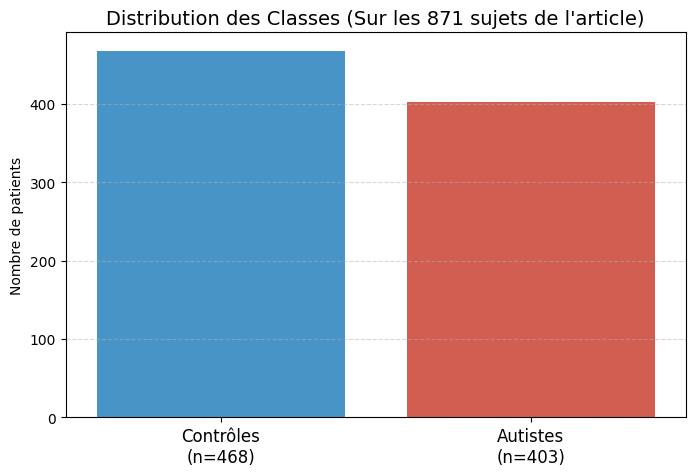


✅ PARFAIT ! Vous avez exactement le même dataset que l'article.


In [3]:


# 2. Chargement de la liste des IDs de l'article
# On essaie de le trouver, sinon on le télécharge
id_file_path = 'subject_IDs.txt'
if not os.path.exists(id_file_path):
    print("Fichier subject_IDs.txt introuvable, téléchargement...")
    !wget https://raw.githubusercontent.com/parisots/population-gcn/master/subject_IDs.txt

with open(id_file_path, 'r') as f:
    target_ids = set(int(line.strip()) for line in f if line.strip())

print(f"🎯 Cible : {len(target_ids)} sujets (Dataset de l'article Parisot 2017)")

# 3. Chargement des données depuis le Drive
drive_data_path = '/content/drive/MyDrive/MVA_ABIDE_FULL/nilearn_data'
print(f"Chargement depuis : {drive_data_path}")

abide = datasets.fetch_abide_pcp(
    data_dir=drive_data_path,
    pipeline='cpac',
    band_pass_filtering=True,
    global_signal_regression=False,
    quality_checked=False,
    n_subjects=None # On charge tout l'annuaire pour filtrer ensuite
)

# 4. Filtrage et Extraction des Labels
final_labels = []
final_ids = []

# Conversion phénotypes
pheno_df = pd.DataFrame(abide.phenotypic)
pheno_records = pheno_df.to_dict(orient='records')

print("Filtrage en cours...")
for func_file, pheno in zip(abide.func_preproc, pheno_records):
    sub_id = int(pheno['SUB_ID'])

    # On garde seulement si c'est un sujet de l'article ET que le fichier existe
    if sub_id in target_ids:
        if os.path.exists(func_file) and os.path.getsize(func_file) >= 1024:
            # Note: Dans ABIDE, 1=Autisme (ASD), 2=Contrôle (TC)
            # On convertit tout de suite : 1 -> 1 (Autisme), 2 -> 0 (Contrôle)
            label = 1 if int(pheno['DX_GROUP']) == 1 else 0
            final_labels.append(label)
            final_ids.append(sub_id)

# 5. Analyse de la Distribution
labels = np.array(final_labels)
n_asd = np.sum(labels == 1)
n_control = np.sum(labels == 0)
total = len(labels)

print("\n" + "="*30)
print("RAPPORT DE DISTRIBUTION")
print("="*30)
print(f"Total Sujets retenus : {total}")
print(f" - Autistes (ASD)     : {n_asd} ({n_asd/total:.1%})")
print(f" - Contrôles (TC)     : {n_control} ({n_control/total:.1%})")
print("="*30)

# 6. Visualisation
plt.figure(figsize=(8, 5))
sns.countplot(x=labels, palette=['#3498db', '#e74c3c']) # Bleu pour Control, Rouge pour ASD
plt.xticks([0, 1], [f'Contrôles\n(n={n_control})', f'Autistes\n(n={n_asd})'], fontsize=12)
plt.title(f'Distribution des Classes (Sur les {total} sujets de l\'article)', fontsize=14)
plt.ylabel('Nombre de patients')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

if total == 871:
    print("\n✅ PARFAIT ! Vous avez exactement le même dataset que l'article.")
else:
    print(f"\n⚠️ Note : Vous avez {total} sujets (l'article en a 871).")
    print("La petite différence s'explique souvent par quelques fichiers corrompus lors du téléchargement.")

# 🧠 Comprendre les Données et le Pipeline

Avant de lancer l'entraînement, il est crucial de comprendre ce que nous avons préparé et comment ces données vont nourrir le modèle GCN.

## 1. Les Variables Clés (L'Inventaire)

Voici le détail des variables générées par le code de chargement :

* **`target_ids` (La Liste Officielle)** :
    * C'est l'ensemble des **871 identifiants** de patients validés et utilisés par l'article de Parisot et al.
    * **Rôle :** Elle sert de filtre. Tout patient téléchargé qui n'est pas dans cette liste est exclu pour garantir la reproductibilité exacte des résultats.

* **`abide` (L'Annuaire Brut)** :
    * Objet fourni par `nilearn`. Il ne contient pas les images en mémoire (trop lourd), mais les **chemins d'accès** vers les fichiers `.nii.gz` (sur le Drive) et les **données phénotypiques** (tableaux cliniques).
    * **Rôle :** C'est la source brute dans laquelle nous allons puiser.

* **`final_labels` (La Vérité Terrain - $y$)** :
    * Liste binaire des diagnostics pour chaque patient retenu.
    * **Encodage :** `1` = Autisme (ASD), `0` = Contrôle (TC).
    * **Rôle :** C'est la cible que le modèle devra apprendre à prédire.

* **`n_asd` / `n_control`** :
    * Statistiques sur la répartition des classes.
    * **Rôle :** Vérifier que le jeu de données est équilibré (pas de biais majeur vers une classe).

---

## 2. Le Pipeline : De l'Image au Graphe

Le modèle GCN ne sait pas lire des IRM ou des fichiers Excel. Il a besoin de tenseurs mathématiques ($X, A, y$). Voici comment nous transformons la variable `abide` :

### Étape A : Transformation des Cerveaux (Création de $X$)
Pour chaque chemin de fichier dans `abide.func_preproc` :
1.  **Lecture :** Chargement de l'image IRM 4D.
2.  **Découpage (Atlas) :** Application de l'atlas *Harvard-Oxford* pour résumer le cerveau en **48 régions**.
3.  **Corrélation :** Calcul des interactions entre régions (qui s'active avec qui ?).
4.  **Résultat ($X$) :** Une matrice où chaque ligne est un patient et chaque colonne est la force de ses connexions neuronales (environ 1128 caractéristiques).

### Étape B : Construction du Réseau Social (Création de $A$)
Utilisation des métadonnées `abide.phenotypic` :
1.  **Comparaison :** On analyse les similarités entre patients.
2.  **Règle de lien :** Si deux patients ont le même **Sexe**, le même **Site d'acquisition** (Hôpital), et une corrélation cérébrale forte...
3.  **Résultat ($A$) :** On crée une arête entre eux. C'est le **Graphe de Population**.

### Étape C : L'Entraînement
Le modèle GCN recevra :
* **$X$** (Les caractéristiques individuelles).
* **$A$** (La structure sociale/relationnelle).
* **$y$** (Les étiquettes pour l'entraînement).

Le modèle apprendra ainsi à diagnostiquer un patient non seulement grâce à son cerveau ($X$), mais aussi grâce aux diagnostics de ses voisins similaires dans le graphe ($A$).

In [ ]:
#####from nilearn import datasets
#####
###### 1. On teste avec 10 sujets d'abord (Sécurité)
#####print("Test de reconnaissance des fichiers (10 sujets)...")
#####
#####abide = datasets.fetch_abide_pcp(
#####    data_dir='/content/drive/MyDrive/MVA_ABIDE/nilearn_data',
#####    pipeline='cpac',
#####
#####    # --- C'EST ICI QUE CA SE JOUE ---
#####    # Il faut remettre les options exactes de votre premier téléchargement
#####    band_pass_filtering=True,        # <--- INDISPENSABLE car vous aviez téléchargé la version filtrée
#####    global_signal_regression=False,  # <--- Comme avant
#####    quality_checked=False,
#####    # -------------------------------
#####
#####    n_subjects=200  # On teste petit d'abord
#####)
#####
#####print(f"✅ Fichiers trouvés : {len(abide.func_preproc)}")
# Si ça affiche 10 instantanément sans barre de chargement, C'EST GAGNÉ.

Test de reconnaissance des fichiers (10 sujets)...


[fetch_abide_pcp] Dataset found in /content/drive/MyDrive/MVA_ABIDE/nilearn_data/ABIDE_pcp

✅ Fichiers trouvés : 200


In [ ]:
###from google.colab import drive
###from nilearn import datasets
###import os
###
#### 1. Monter le Drive (Obligatoire pour accéder à tes fichiers)
###drive.mount('/content/drive')
###
#### 2. Définir le chemin où tu as sauvegardé les données
#### C'est le dossier de destination que tu as utilisé dans ton script de copie
###drive_data_path = '/content/drive/MyDrive/MVA_ABIDE/nilearn_data'
###
#### Vérification rapide que le dossier existe bien
###if os.path.exists(drive_data_path):
###    print(f"✅ Dossier de sauvegarde trouvé : {drive_data_path}")
###else:
###    print(f"⚠️ ATTENTION : Le dossier {drive_data_path} n'existe pas. Vérifie le chemin.")
###
#### 3. Charger les données en pointant vers le Drive
#### L'astuce est le paramètre 'data_dir' qui remplace le téléchargement par une lecture locale
###print("Chargement de la liste des sujets depuis le Drive...")
###
###abide = datasets.fetch_abide_pcp(
###    pipeline='cpac',
###    quality_checked=False,
###    n_subjects=200,          # IMPORTANT : On redemande bien 200 sujets
###    data_dir=drive_data_path # <--- C'est ici qu'on force l'utilisation du Drive
###)
###
#### 4. Vérification finale
###print(f"Nombre de fichiers disponibles dans la variable 'abide' : {len(abide.func_preproc)}")
###
###if len(abide.func_preproc) >= 200:
###    print("✅ SUCCÈS ! La variable 'abide' est réparée avec tes 200 patients.")
###    print("Tu peux maintenant relancer la cellule de calcul des matrices (la boucle for).")
###else:
###    print("⚠️ Toujours pas 200 sujets. Vérifie que la copie vers le Drive s'est bien terminée la dernière fois.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dossier de sauvegarde trouvé : /content/drive/MyDrive/MVA_ABIDE/nilearn_data
Chargement de la liste des sujets depuis le Drive...


[fetch_abide_pcp] Dataset found in /content/drive/MyDrive/MVA_ABIDE/nilearn_data/ABIDE_pcp

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0004_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 729088 of 107986683 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 11911168 of 107986683 bytes (11.0%%,   17.6s remaining)

[fetch_abide_pcp] Downloaded 28114944 of 107986683 bytes (26.0%%,    9.4s remaining)

[fetch_abide_pcp] Downloaded 45531136 of 107986683 bytes (42.2%%,    6.1s remaining)

[fetch_abide_pcp] Downloaded 62439424 of 107986683 bytes (57.8%%,    4.1s remaining)

[fetch_abide_pcp] Downloaded 80265216 of 107986683 bytes (74.3%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 98091008 of 107986683 bytes (90.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0005_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 110518334 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 10575872 of 110518334 bytes (9.6%%,   20.9s remaining)

[fetch_abide_pcp] Downloaded 23814144 of 110518334 bytes (21.5%%,   12.1s remaining)

[fetch_abide_pcp] Downloaded 39346176 of 110518334 bytes (35.6%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 56025088 of 110518334 bytes (50.7%%,    5.4s remaining)

[fetch_abide_pcp] Downloaded 72425472 of 110518334 bytes (65.5%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 87973888 of 110518334 bytes (79.6%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 103587840 of 110518334 bytes (93.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0006_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 115167850 bytes (0.6%%,  3.1min remaining)

[fetch_abide_pcp] Downloaded 11321344 of 115167850 bytes (9.8%%,   20.5s remaining)

[fetch_abide_pcp] Downloaded 27394048 of 115167850 bytes (23.8%%,   10.8s remaining)

[fetch_abide_pcp] Downloaded 43483136 of 115167850 bytes (37.8%%,    7.4s remaining)

[fetch_abide_pcp] Downloaded 57753600 of 115167850 bytes (50.1%%,    5.5s remaining)

[fetch_abide_pcp] Downloaded 72515584 of 115167850 bytes (63.0%%,    3.9s remaining)

[fetch_abide_pcp] Downloaded 87965696 of 115167850 bytes (76.4%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 102219776 of 115167850 bytes (88.8%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0007_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 102974496 bytes (0.8%%,  2.3min remaining)

[fetch_abide_pcp] Downloaded 13877248 of 102974496 bytes (13.5%%,   13.9s remaining)

[fetch_abide_pcp] Downloaded 30687232 of 102974496 bytes (29.8%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 48988160 of 102974496 bytes (47.6%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 66224128 of 102974496 bytes (64.3%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 84312064 of 102974496 bytes (81.9%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 101384192 of 102974496 bytes (98.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0008_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 105723516 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 3276800 of 105723516 bytes (3.1%%,  1.2min remaining)

[fetch_abide_pcp] Downloaded 6479872 of 105723516 bytes (6.1%%,   53.4s remaining)

[fetch_abide_pcp] Downloaded 10543104 of 105723516 bytes (10.0%%,   41.2s remaining)

[fetch_abide_pcp] Downloaded 14606336 of 105723516 bytes (13.8%%,   34.7s remaining)

[fetch_abide_pcp] Downloaded 20897792 of 105723516 bytes (19.8%%,   26.8s remaining)

[fetch_abide_pcp] Downloaded 27205632 of 105723516 bytes (25.7%%,   22.0s remaining)

[fetch_abide_pcp] Downloaded 36954112 of 105723516 bytes (35.0%%,   16.0s remaining)

[fetch_abide_pcp] Downloaded 46735360 of 105723516 bytes (44.2%%,   12.2s remaining)

[fetch_abide_pcp] Downloaded 61480960 of 105723516 bytes (58.2%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 76177408 of 105723516 bytes (72.1%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 91791360 of 105723516 bytes (86.8%%,    2.0s remaining)

[fetch_abide_pcp]  ...done. (15 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0009_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 794624 of 109823276 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 14114816 of 109823276 bytes (12.9%%,   14.8s remaining)

[fetch_abide_pcp] Downloaded 31727616 of 109823276 bytes (28.9%%,    8.1s remaining)

[fetch_abide_pcp] Downloaded 50192384 of 109823276 bytes (45.7%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 68640768 of 109823276 bytes (62.5%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 87138304 of 109823276 bytes (79.3%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 102776832 of 109823276 bytes (93.6%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0010_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 524288 of 108702932 bytes (0.5%%,  3.8min remaining)

[fetch_abide_pcp] Downloaded 7757824 of 108702932 bytes (7.1%%,   28.5s remaining)

[fetch_abide_pcp] Downloaded 16572416 of 108702932 bytes (15.2%%,   18.2s remaining)

[fetch_abide_pcp] Downloaded 25567232 of 108702932 bytes (23.5%%,   14.2s remaining)

[fetch_abide_pcp] Downloaded 34725888 of 108702932 bytes (31.9%%,   11.7s remaining)

[fetch_abide_pcp] Downloaded 44310528 of 108702932 bytes (40.8%%,    9.6s remaining)

[fetch_abide_pcp] Downloaded 51486720 of 108702932 bytes (47.4%%,    8.8s remaining)

[fetch_abide_pcp] Downloaded 59744256 of 108702932 bytes (55.0%%,    7.4s remaining)

[fetch_abide_pcp] Downloaded 68345856 of 108702932 bytes (62.9%%,    5.9s remaining)

[fetch_abide_pcp] Downloaded 77094912 of 108702932 bytes (70.9%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 86368256 of 108702932 bytes (79.5%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 96444416 of 108702932 bytes (88.7%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 106455040 of 108702932 bytes (97.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (16 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0011_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 696320 of 100532666 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 11272192 of 100532666 bytes (11.2%%,   17.3s remaining)

[fetch_abide_pcp] Downloaded 25952256 of 100532666 bytes (25.8%%,    9.5s remaining)

[fetch_abide_pcp] Downloaded 40321024 of 100532666 bytes (40.1%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 56410112 of 100532666 bytes (56.1%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 72318976 of 100532666 bytes (71.9%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 87769088 of 100532666 bytes (87.3%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0012_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 110228275 bytes (0.6%%,  3.0min remaining)

[fetch_abide_pcp] Downloaded 2842624 of 110228275 bytes (2.6%%,  1.4min remaining)

[fetch_abide_pcp] Downloaded 5259264 of 110228275 bytes (4.8%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 7970816 of 110228275 bytes (7.2%%,   56.7s remaining)

[fetch_abide_pcp] Downloaded 10625024 of 110228275 bytes (9.6%%,   52.3s remaining)

[fetch_abide_pcp] Downloaded 13492224 of 110228275 bytes (12.2%%,   47.7s remaining)

[fetch_abide_pcp] Downloaded 16506880 of 110228275 bytes (15.0%%,   44.1s remaining)

[fetch_abide_pcp] Downloaded 19587072 of 110228275 bytes (17.8%%,   40.9s remaining)

[fetch_abide_pcp] Downloaded 22683648 of 110228275 bytes (20.6%%,   38.3s remaining)

[fetch_abide_pcp] Downloaded 25780224 of 110228275 bytes (23.4%%,   36.1s remaining)

[fetch_abide_pcp] Downloaded 28893184 of 110228275 bytes (26.2%%,   34.2s remaining)

[fetch_abide_pcp] Downloaded 32022528 of 110228275 bytes (29.1%%,   32.3s remaining)

[fetch_abide_pcp] Downloaded 35069952 of 110228275 bytes (31.8%%,   30.7s remaining)

[fetch_abide_pcp] Downloaded 37543936 of 110228275 bytes (34.1%%,   29.8s remaining)

[fetch_abide_pcp] Downloaded 40345600 of 110228275 bytes (36.6%%,   28.6s remaining)

[fetch_abide_pcp] Downloaded 43376640 of 110228275 bytes (39.4%%,   27.1s remaining)

[fetch_abide_pcp] Downloaded 46424064 of 110228275 bytes (42.1%%,   25.7s remaining)

[fetch_abide_pcp] Downloaded 48766976 of 110228275 bytes (44.2%%,   24.9s remaining)

[fetch_abide_pcp] Downloaded 51290112 of 110228275 bytes (46.5%%,   24.0s remaining)

[fetch_abide_pcp] Downloaded 53944320 of 110228275 bytes (48.9%%,   22.9s remaining)

KeyboardInterrupt: 

### Description des données

In [5]:
!ls /root/nilearn_data/ABIDE_pcp


cpac  Phenotypic_V1_0b_preprocessed1.csv


In [6]:
!ls /root/nilearn_data/ABIDE_pcp/cpac


filt_noglobal


In [7]:
!cp -r /root/nilearn_data /content/


^C


In [9]:
print(abide.keys())


dict_keys(['description', 'phenotypic', 'func_preproc'])


In [10]:
print(abide.description)


.. _abide_dataset:

ABIDE PCP dataset

Access
------
See :func:`nilearn.datasets.fetch_abide_pcp`.

Notes
-----
The Autism Brain Imaging Data Exchange (ABIDE) dataset provides previously
collected resting state functional magnetic resonance imaging datasets
from 539 individuals with ASD and 573 typical controls for the purpose
of data sharing in the broader scientific community. This grass-root
initiative involved 16 international sites, sharing 20 samples yielding
1112 datasets composed of both MRI data and an extensive array of
phenotypic information common across nearly all sites (see below).

Note that this is the preprocessed version of ABIDE provided by the
preprocess connectome projects (PCP).

See :footcite:t:`Nielsen2013`.

Content
-------
    :'phenotypic': Behavioral information.

References
----------

.. footbibliography::

For more information about this dataset's structure:

http://preprocessed-connectomes-project.org/

https://childmind.org/science/global-open-science/h

### Enregistrement de l'échantillon de données sur le drive

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#####import shutil
#####import os
#####from google.colab import drive
#####
###### 1. Monter le Drive (si pas déjà fait)
######drive.mount('/content/drive')
#####
###### 2. Définir les chemins
###### Source : Le dossier que je vois sur ta capture
#####source_folder = '/root/nilearn_data'
#####
###### Destination : Où ça va aller sur ton Drive
###### Je te conseille de créer un dossier propre "MVA_ABIDE" pour ne pas mettre le bazar
#####destination_folder = '/content/drive/MyDrive/MVA_ABIDE_FULL/nilearn_data'
#####
###### 3. Copie
#####print(f"Copie de {source_folder} vers {destination_folder}...")
#####print("Cela peut prendre 5 à 10 minutes selon la taille...")
#####
#####if os.path.exists(destination_folder):
#####    print("⚠️ Le dossier existe déjà sur le Drive ! Je ne touche à rien par sécurité.")
#####else:
#####    try:
#####        shutil.copytree(source_folder, destination_folder)
#####        print("✅ SUCCÈS ! Tes données sont sauvées.")
#####        print("Demain, tu n'auras plus besoin de télécharger.")
#####    except Exception as e:
#####        print(f"Erreur lors de la copie : {e}")

Copie de /root/nilearn_data vers /content/drive/MyDrive/MVA_ABIDE_FULL/nilearn_data...
Cela peut prendre 5 à 10 minutes selon la taille...
✅ SUCCÈS ! Tes données sont sauvées.
Demain, tu n'auras plus besoin de télécharger.


### Suite du traitement des données

In [11]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker
from sklearn.feature_selection import SelectKBest, f_classif

atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# --- 1. Masker robuste ---
masker = NiftiLabelsMasker(
    labels_img=atlas.maps,
    standardize=True,
    memory='nilearn_cache',
    verbose=0,
    resampling_target='data'   # La protection anti-crash géométrique
)

cm = ConnectivityMeasure(kind='correlation', vectorize=True, discard_diagonal=True)

correlations = []
labels = []
site_ids = []
sexes = []

# CORRECTION ICI : On convertit d'abord en DataFrame Pandas pour éviter l'erreur
# car nilearn renvoie souvent un numpy array structuré
pheno_df = pd.DataFrame(abide.phenotypic)
pheno_records = pheno_df.to_dict(orient='records')

print("Calcul des matrices de connectivité (Features)...")

for i, (func_file, pheno) in enumerate(zip(abide.func_preproc, pheno_records)):
    try:
        # sécurité basique sur les fichiers
        if not os.path.exists(func_file) or os.path.getsize(func_file) < 1024:
            raise ValueError("Fichier image corrompu ou trop petit")

        # 1) séries temporelles
        time_series = masker.fit_transform(func_file)

        # 2) matrice de corrélation vectorisée
        corr = cm.fit_transform([time_series])[0]

        correlations.append(corr)
        labels.append(int(pheno['DX_GROUP']))  # 1=Autism, 2=Control
        site_ids.append(pheno['SITE_ID'])
        sexes.append(pheno['SEX'])

        if i % 10 == 0:
            print(f"Sujet {i} traité.")

    except Exception as e:
        # On affiche juste un petit point ou message court pour ne pas spammer
        print(f"Sujet {i} ignoré (Fichier invalide ou erreur lecture).")

# --- 3. Conversion en numpy ---
X_raw = np.array(correlations)
y = (np.array(labels) == 1).astype(int)  # 1 = Autism, 0 = Control

if X_raw.size == 0:
    print("ERREUR CRITIQUE : aucun sujet valide.")
else:
    print(f"Sélection des features sur {X_raw.shape[0]} sujets valides...")
    # Sécurité supplémentaire intelligente
    ##laisser ce k quand j'aurais toutes les données
    #k = min(2000, X_raw.shape[1])

    ##A MODIFIER QUAND J'AURAI TOUTE LES DONNÉES
    k = min(2000, X_raw.shape[1])


    selector = SelectKBest(f_classif, k=k)
    X = selector.fit_transform(X_raw, y)
    print(f"✅ Données prêtes : {X.shape[0]} sujets, {X.shape[1]} features.")

[fetch_atlas_harvard_oxford] Dataset found in /root/nilearn_data/fsl

Calcul des matrices de connectivité (Features)...
Sujet 0 traité.
Sujet 10 traité.
Sujet 20 traité.
Sujet 30 traité.
Sujet 40 traité.
Sujet 50 traité.
Sujet 60 traité.
Sujet 70 traité.
Sujet 80 traité.
Sujet 90 traité.
Sujet 100 traité.
Sujet 110 traité.
Sujet 120 traité.
Sujet 130 traité.
Sujet 140 traité.
Sujet 150 traité.
Sujet 160 traité.
Sujet 170 traité.
Sujet 180 traité.
Sujet 190 traité.
Sujet 200 traité.
Sujet 210 traité.
Sujet 220 traité.
Sujet 230 traité.
Sujet 240 traité.
Sujet 250 traité.
Sujet 260 traité.
Sujet 270 traité.
Sujet 280 traité.
Sujet 290 traité.
Sujet 300 traité.
Sujet 310 traité.
Sujet 320 traité.
Sujet 330 traité.
Sujet 340 traité.
Sujet 350 traité.
Sujet 360 traité.
Sujet 370 traité.
Sujet 380 traité.
Sujet 390 traité.
Sujet 400 traité.
Sujet 410 traité.
Sujet 420 traité.
Sujet 430 traité.
Sujet 440 traité.
Sujet 450 traité.
Sujet 460 traité.
Sujet 470 traité.
Sujet 480 traité.
Sujet 490 traité.
Sujet 500 traité.
Sujet 510 traité.
Sujet 520 traité.
Sujet 5

In [11]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker
from sklearn.feature_selection import SelectKBest, f_classif

atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# --- 1. Masker robuste ---
masker = NiftiLabelsMasker(
    labels_img=atlas.maps,
    standardize=True,
    memory='nilearn_cache',
    verbose=0,
    resampling_target='data'   # La protection anti-crash géométrique
)

cm = ConnectivityMeasure(kind='correlation', vectorize=True, discard_diagonal=True)

correlations = []
labels = []
site_ids = []
sexes = []

# CORRECTION ICI : On convertit d'abord en DataFrame Pandas pour éviter l'erreur
# car nilearn renvoie souvent un numpy array structuré
pheno_df = pd.DataFrame(abide.phenotypic)
pheno_records = pheno_df.to_dict(orient='records')

print("Calcul des matrices de connectivité (Features)...")

for i, (func_file, pheno) in enumerate(zip(abide.func_preproc, pheno_records)):
    try:
        # sécurité basique sur les fichiers
        if not os.path.exists(func_file) or os.path.getsize(func_file) < 1024:
            raise ValueError("Fichier image corrompu ou trop petit")

        # 1) séries temporelles
        time_series = masker.fit_transform(func_file)

        # 2) matrice de corrélation vectorisée
        corr = cm.fit_transform([time_series])[0]

        correlations.append(corr)
        labels.append(int(pheno['DX_GROUP']))  # 1=Autism, 2=Control
        site_ids.append(pheno['SITE_ID'])
        sexes.append(pheno['SEX'])

        if i % 10 == 0:
            print(f"Sujet {i} traité.")

    except Exception as e:
        # On affiche juste un petit point ou message court pour ne pas spammer
        print(f"Sujet {i} ignoré (Fichier invalide ou erreur lecture).")

# --- 3. Conversion en numpy ---
X_raw = np.array(correlations)
y = (np.array(labels) == 1).astype(int)  # 1 = Autism, 0 = Control

if X_raw.size == 0:
    print("ERREUR CRITIQUE : aucun sujet valide.")
else:
    print(f"Sélection des features sur {X_raw.shape[0]} sujets valides...")
    # Sécurité supplémentaire intelligente
    ##laisser ce k quand j'aurais toutes les données
    #k = min(2000, X_raw.shape[1])

    ##A MODIFIER QUAND J'AURAI TOUTE LES DONNÉES
    k = min(2000, X_raw.shape[1])


    selector = SelectKBest(f_classif, k=k)
    X = selector.fit_transform(X_raw, y)
    print(f"✅ Données prêtes : {X.shape[0]} sujets, {X.shape[1]} features.")

/tmp/ipython-input-2902991651.py:2: DeprecationWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  from nilearn.input_data import NiftiLabelsMasker


[fetch_atlas_harvard_oxford] Added README.md to /root/nilearn_data

[fetch_atlas_harvard_oxford] Dataset created in /root/nilearn_data/fsl

[fetch_atlas_harvard_oxford] Downloading data from https://www.nitrc.org/frs/download.php/9902/HarvardOxford.tgz 
...

[fetch_atlas_harvard_oxford] Downloaded 385024 of 25716861 bytes (1.5%%,  1.1min remaining)

[fetch_atlas_harvard_oxford] Downloaded 6963200 of 25716861 bytes (27.1%%,    5.5s remaining)

[fetch_atlas_harvard_oxford] Downloaded 18915328 of 25716861 bytes (73.6%%,    1.1s remaining)

[fetch_atlas_harvard_oxford]  ...done. (5 seconds, 0 min)

[fetch_atlas_harvard_oxford] Extracting data from 
/root/nilearn_data/fsl/5c734f16e50cc772ef593cab9bb3137b/HarvardOxford.tgz...

[fetch_atlas_harvard_oxford] .. done.

Calcul des matrices de connectivité (Features)...
Sujet 0 traité.
Sujet 10 traité.
Sujet 20 traité.


KeyboardInterrupt: 

_____

In [12]:
import pandas as pd
import numpy as np
import os
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker
from sklearn.feature_selection import SelectKBest, f_classif

# --- ÉTAPE PRÉALABLE : S'assurer qu'on a la liste des IDs cibles ---
# (Normalement déjà fait dans ton code 1, mais on le remet pour la sécurité)
if 'target_ids' not in locals():
    print("Chargement de la liste des sujets cibles...")
    with open('subject_IDs.txt', 'r') as f:
        target_ids = set(int(line.strip()) for line in f if line.strip())

# --- CONFIGURATION ---
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

masker = NiftiLabelsMasker(
    labels_img=atlas.maps,
    standardize=True,
    memory='nilearn_cache',
    verbose=0,
    resampling_target='data'
)

cm = ConnectivityMeasure(kind='correlation', vectorize=True, discard_diagonal=True)

correlations = []
labels = []
site_ids = []
sexes = []

# Conversion pour lecture facile
pheno_df = pd.DataFrame(abide.phenotypic)
pheno_records = pheno_df.to_dict(orient='records')

print(f"Calcul des matrices pour les {len(target_ids)} sujets de l'article UNIQUEMENT...")

count_kept = 0
count_skipped = 0

for i, (func_file, pheno) in enumerate(zip(abide.func_preproc, pheno_records)):

    # --- LE FILTRE EST ICI (Fusion des deux codes) ---
    sub_id = int(pheno['SUB_ID'])

    # Si le sujet n'est pas dans la liste officielle, on zappe !
    if sub_id not in target_ids:
        count_skipped += 1
        continue

    # Si on arrive ici, c'est un "bon" sujet
    try:
        # Sécurité fichier
        if not os.path.exists(func_file) or os.path.getsize(func_file) < 1024:
            raise ValueError("Fichier image corrompu ou trop petit")

        # 1) Séries temporelles
        time_series = masker.fit_transform(func_file)

        # 2) Matrice de corrélation
        corr = cm.fit_transform([time_series])[0]

        correlations.append(corr)
        # Conversion du label (1=Autisme, 2=Control) -> (1, 0)
        label = 1 if int(pheno['DX_GROUP']) == 1 else 0
        labels.append(label)

        site_ids.append(pheno['SITE_ID'])
        sexes.append(pheno['SEX'])

        count_kept += 1
        if count_kept % 50 == 0:
            print(f"Sujets traités : {count_kept} ...")

    except Exception as e:
        print(f"Sujet {sub_id} (Cible) ignoré : {e}")

# --- Conversion finale ---
X_raw = np.array(correlations)
y = np.array(labels)

print("\n" + "="*30)
print(f"TERMINÉ !")
print(f"Sujets ignorés (Hors article) : {count_skipped}")
print(f"Sujets traités (Article)      : {count_kept}")
print(f"Taille de X_raw               : {X_raw.shape}")
print("="*30)

if X_raw.size > 0:
    print(f"Sélection des features...")
    # On laisse 2000 car l'atlas en a 1128, donc il prendra tout (k=1128)
    k = min(2000, X_raw.shape[1])
    selector = SelectKBest(f_classif, k=k)
    X = selector.fit_transform(X_raw, y)
    print(f"✅ Données prêtes pour l'entraînement : {X.shape}")

[fetch_atlas_harvard_oxford] Dataset found in /root/nilearn_data/fsl

Calcul des matrices pour les 871 sujets de l'article UNIQUEMENT...
Sujets traités : 50 ...
Sujets traités : 100 ...
Sujets traités : 150 ...
Sujets traités : 200 ...
Sujets traités : 250 ...
Sujets traités : 300 ...
Sujets traités : 350 ...
Sujets traités : 400 ...
Sujets traités : 450 ...
Sujets traités : 500 ...
Sujets traités : 550 ...
Sujets traités : 600 ...
Sujets traités : 650 ...
Sujets traités : 700 ...
Sujets traités : 750 ...
Sujets traités : 800 ...
Sujets traités : 850 ...

TERMINÉ !
Sujets ignorés (Hors article) : 164
Sujets traités (Article)      : 871
Taille de X_raw               : (871, 1128)
Sélection des features...
✅ Données prêtes pour l'entraînement : (871, 1128)


### **Pour enregistrer les checkpoints et données traitées que l'on injectera dans nos modèles (ce sont ces données qu'il faudra toujours utilisé pour entrainer chaque modèle**

In [29]:
import os
import numpy as np
import pandas as pd

# --- CONFIGURATION DU DOSSIER DE SAUVEGARDE ---
# On choisit un dossier sur le Drive pour que ce soit permanent
save_dir = '/content/drive/MyDrive/MVA_ABIDE/checkpoints_article/'
os.makedirs(save_dir, exist_ok=True) # Crée le dossier s'il n'existe pas

print(f"💾 Sauvegarde en cours dans : {save_dir} ...")

# 1. Sauvegarder les Matrices X (Features) et y (Labels)
# On utilise le format .npy de numpy qui est très rapide et compressé
np.save(os.path.join(save_dir, 'X_article.npy'), X)
np.save(os.path.join(save_dir, 'y_article.npy'), y)

# 2. Sauvegarder les Métadonnées (Site, Sexe) pour le Graphe
# On utilise Pandas pour faire un petit fichier CSV propre
metadata_df = pd.DataFrame({
    'SITE_ID': site_ids,
    'SEX': sexes
})
metadata_df.to_csv(os.path.join(save_dir, 'metadata_article.csv'), index=False)

print("✅ SUCCÈS ! Données sauvegardées.")
print("La prochaine fois, tu pourras charger ces fichiers en 2 secondes au lieu de recalculer pendant 2h.")

💾 Sauvegarde en cours dans : /content/drive/MyDrive/MVA_ABIDE/checkpoints_article/ ...
✅ SUCCÈS ! Données sauvegardées.
La prochaine fois, tu pourras charger ces fichiers en 2 secondes au lieu de recalculer pendant 2h.


##Chargement de ces données en question (à mettre au début des codes d'entrainement à l'avenir)

In [ ]:
import torch
import numpy as np
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from google.colab import drive

# 1. Monter le Drive
drive.mount('/content/drive')

# 2. Charger les données traitées (Checkpoints)
# Adapte le chemin si tu as changé le dossier de sauvegarde
load_dir = '/content/drive/MyDrive/MVA_ABIDE/checkpoints_article/'

print("Chargement des données depuis le Drive...")

if os.path.exists(load_dir):
    # Chargement des matrices X et y
    X = np.load(os.path.join(load_dir, 'X_article.npy'))
    y = np.load(os.path.join(load_dir, 'y_article.npy'))

    # Chargement des métadonnées (Site, Sexe) pour le graphe
    meta_df = pd.read_csv(os.path.join(load_dir, 'metadata_article.csv'))
    site_ids = meta_df['SITE_ID'].tolist()
    sexes = meta_df['SEX'].tolist()

    print("✅ Données chargées avec succès !")
    print(f" - Patients : {X.shape[0]}")
    print(f" - Features : {X.shape[1]}")
    print(f" - Labels   : {y.shape[0]}")
else:
    print("❌ ERREUR : Le dossier de sauvegarde est introuvable. As-tu bien lancé la sauvegarde ?")

# À partir d'ici, tu as tes variables X, y, site_ids, sexes.
# Tu peux directement lancer 'build_population_graph' et tes modèles !

_____

In [13]:
X_raw.shape[1]

1128

In [14]:
print("--- Rapport de Vérification ---")
print(f"Nombre de patients valides (X) : {X.shape[0]}")
print(f"Nombre de caractéristiques par patient : {X.shape[1]} (Devrait être 2000)")
print(f"Nombre de diagnostics (y) : {y.shape[0]} (Doit être égal au nombre de patients)")
print(f"Exemple de diagnostic : {y[:5]} (0=Contrôle, 1=Autisme)")

if X.shape[0] > 0 and X.shape[1] == 2000:
    print("\n✅ TOUT EST BON ! Tu peux passer à la suite.")
else:
    print("\n⚠️ PROBLÈME : Les données sont vides ou mal formées.")

--- Rapport de Vérification ---
Nombre de patients valides (X) : 871
Nombre de caractéristiques par patient : 1128 (Devrait être 2000)
Nombre de diagnostics (y) : 871 (Doit être égal au nombre de patients)
Exemple de diagnostic : [1 1 1 1 1] (0=Contrôle, 1=Autisme)

⚠️ PROBLÈME : Les données sont vides ou mal formées.


In [13]:
###print("--- Rapport de Vérification ---")
###print(f"Nombre de patients valides (X) : {X.shape[0]}")
###print(f"Nombre de caractéristiques par patient : {X.shape[1]} (Devrait être 2000)")
###print(f"Nombre de diagnostics (y) : {y.shape[0]} (Doit être égal au nombre de patients)")
###print(f"Exemple de diagnostic : {y[:5]} (0=Contrôle, 1=Autisme)")
###
###if X.shape[0] > 0 and X.shape[1] == 2000:
###    print("\n✅ TOUT EST BON ! Tu peux passer à la suite.")
###else:
###    print("\n⚠️ PROBLÈME : Les données sont vides ou mal formées.")

--- Rapport de Vérification ---
Nombre de patients valides (X) : 1035
Nombre de caractéristiques par patient : 1128 (Devrait être 2000)
Nombre de diagnostics (y) : 1035 (Doit être égal au nombre de patients)
Exemple de diagnostic : [1 1 1 1 1] (0=Contrôle, 1=Autisme)

⚠️ PROBLÈME : Les données sont vides ou mal formées.


## Construction du "Population Graph"

In [15]:
from scipy.spatial.distance import pdist, squareform

def build_population_graph(X, site_ids, sexes, k_neighbors=10):
    num_nodes = X.shape[0]

    # 1. Similarité Phénotypique (Graphe statique)
    # W(v, w) augmente si même Sexe et même Site
    # Le papier utilise Eq 1 : Sim * Phenotypic
    # Ici on simplifie : Adjacence = 1 si (Même Site OU Même Sexe) - C'est une heuristique courante pour reproduire leur graphe.
    # Pour être précis avec main_ABIDE.py : ils utilisent Kronecker delta sur Sex et Site.

    site_ids_enc = LabelEncoder().fit_transform(site_ids)
    sexes_enc = LabelEncoder().fit_transform(sexes)

    # Matrices d'égalité (N x N)
    same_site = np.equal.outer(site_ids_enc, site_ids_enc).astype(int)
    same_sex = np.equal.outer(sexes_enc, sexes_enc).astype(int)

    # Graphe Phénotypique (somme des Kronecker deltas comme dans l'Eq 1 du pdf)
    pheno_adj = same_site + same_sex
    # On enlève la diagonale
    np.fill_diagonal(pheno_adj, 0)

    # 2. Similarité des Features (Imaging)
    # Calcul de la distance de corrélation entre les vecteurs de connectivité
    dist = squareform(pdist(X, metric='correlation'))
    sigma = np.mean(dist)
    feature_sim = np.exp(- dist ** 2 / (2 * sigma ** 2))

    # 3. Graphe Final
    # Combinaison : Phénotype * Feature Similarity (cf main_ABIDE.py train_fold)
    # L'article multiplie le graphe phénotypique par la similarité visuelle
    final_adj = pheno_adj * feature_sim

    # Sparsification : On ne garde que les k plus fortes connexions par noeud pour alléger le GCN
    # Sinon le graphe est complet (trop lourd)
    mask = np.zeros_like(final_adj)
    for i in range(num_nodes):
        neighbors = np.argsort(final_adj[i])[-k_neighbors:] # Top k voisins
        mask[i, neighbors] = 1
        mask[neighbors, i] = 1 # Symétrique

    final_adj_sparse = final_adj * mask

    # Conversion vers Edge Index pour PyTorch Geometric
    rows, cols = np.where(final_adj_sparse > 0)
    edge_index = torch.tensor([rows, cols], dtype=torch.long)
    edge_attr = torch.tensor(final_adj_sparse[rows, cols], dtype=torch.float)

    return edge_index, edge_attr

# Construction du graphe
print("Construction du Population Graph...")
edge_index, edge_attr = build_population_graph(X, site_ids, sexes, k_neighbors=5) # k petit pour l'exemple

# Création de l'objet Data PyG
x_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.long)

# Masques Train/Test (Split 80/20)
indices = np.random.permutation(len(y))
train_idx = torch.tensor(indices[:int(0.8*len(y))], dtype=torch.long)
test_idx = torch.tensor(indices[int(0.8*len(y)):], dtype=torch.long)

data = Data(x=x_tensor, edge_index=edge_index, edge_attr=edge_attr, y=y_tensor)
data.train_mask = torch.zeros(len(y), dtype=torch.bool)
data.test_mask = torch.zeros(len(y), dtype=torch.bool)
data.train_mask[train_idx] = True
data.test_mask[test_idx] = True

print(f"Graphe construit : {data}")

Construction du Population Graph...
Graphe construit : Data(x=[871, 1128], edge_index=[2, 6344], edge_attr=[6344], y=[871], train_mask=[871], test_mask=[871])


/tmp/ipython-input-3039564626.py:47: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  edge_index = torch.tensor([rows, cols], dtype=torch.long)


#### Plot le graph

Calcul du layout (disposition visuelle)...


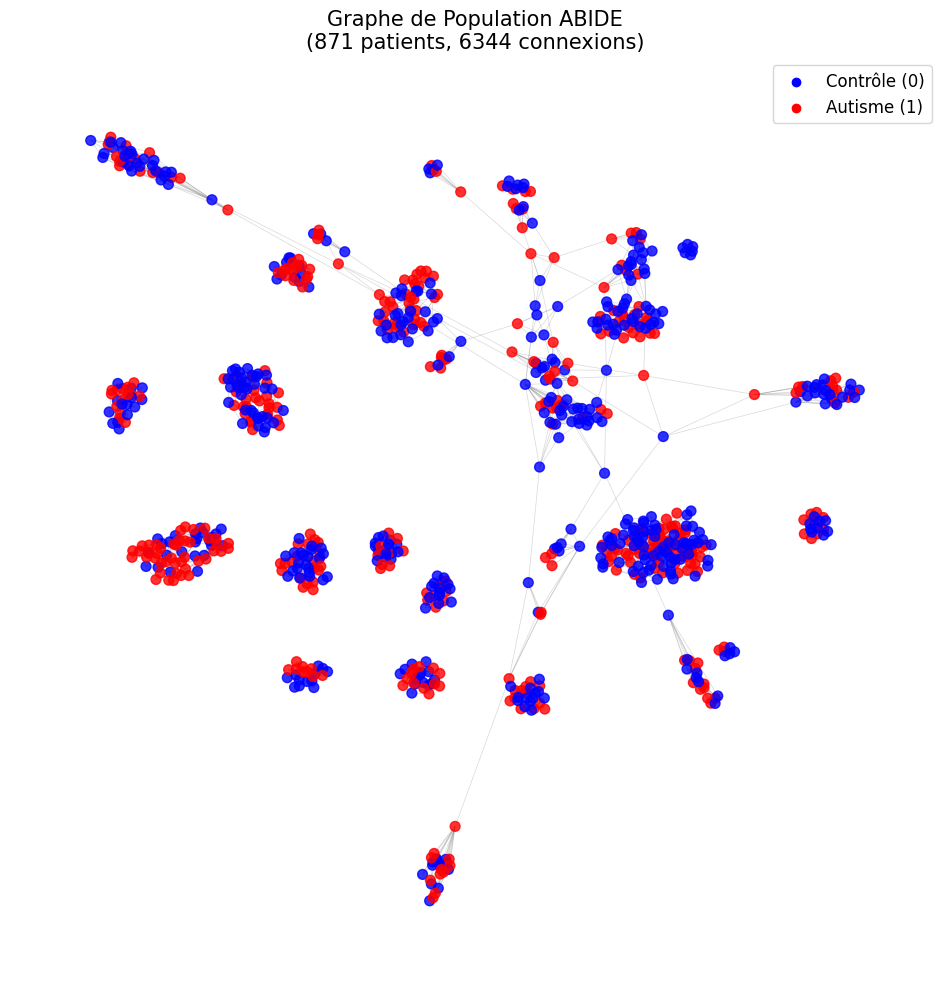

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

def plot_population_graph(data, title="Graphe de Population ABIDE"):
    plt.figure(figsize=(12, 12))

    # 1. Conversion PyG -> NetworkX
    # to_undirected=True car votre graphe est symétrique
    G = to_networkx(data, to_undirected=True)

    # 2. Gestion des couleurs (Diagnostics)
    # data.y contient 0 (Control) et 1 (Autism)
    # On définit une couleur pour chaque nœud
    node_colors = []
    for node_idx in range(data.num_nodes):
        label = data.y[node_idx].item()
        if label == 1:
            node_colors.append('red')   # Autiste
        else:
            node_colors.append('blue')  # Contrôle (Témoin)

    # 3. Calcul de la disposition (Layout)
    # 'spring_layout' simule des ressorts : les nœuds connectés s'attirent
    print("Calcul du layout (disposition visuelle)...")
    pos = nx.spring_layout(G, seed=42, k=0.15)  # k règle l'espacement

    # 4. Dessin
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3, edge_color='gray')

    # Légende manuelle pour comprendre
    plt.scatter([], [], c='blue', label='Contrôle (0)')
    plt.scatter([], [], c='red', label='Autisme (1)')
    plt.legend(fontsize='large')

    plt.title(title + f"\n({data.num_nodes} patients, {data.num_edges} connexions)", fontsize=15)
    plt.axis('off')
    plt.show()

# Lancer la visualisation
plot_population_graph(data)

Calcul du layout (disposition visuelle)...


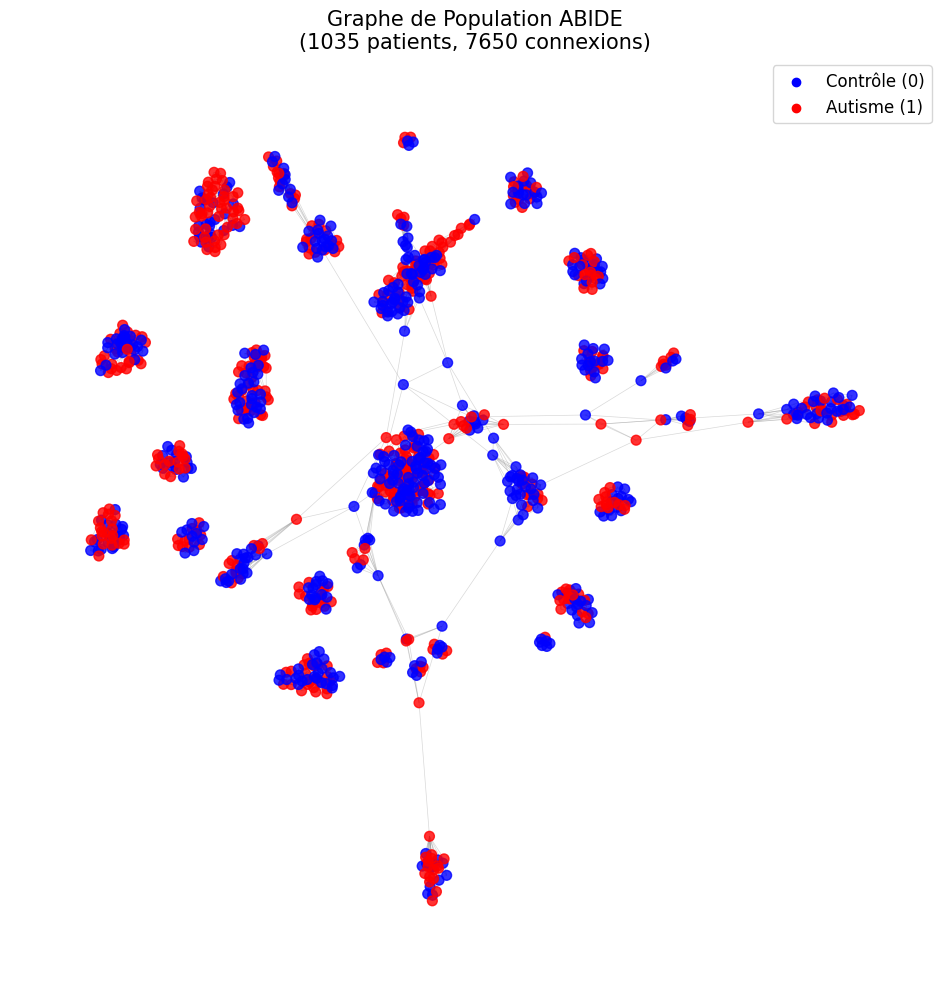

In [15]:
##import networkx as nx
##import matplotlib.pyplot as plt
##from torch_geometric.utils import to_networkx
##
##def plot_population_graph(data, title="Graphe de Population ABIDE"):
##    plt.figure(figsize=(12, 12))
##
##    # 1. Conversion PyG -> NetworkX
##    # to_undirected=True car votre graphe est symétrique
##    G = to_networkx(data, to_undirected=True)
##
##    # 2. Gestion des couleurs (Diagnostics)
##    # data.y contient 0 (Control) et 1 (Autism)
##    # On définit une couleur pour chaque nœud
##    node_colors = []
##    for node_idx in range(data.num_nodes):
##        label = data.y[node_idx].item()
##        if label == 1:
##            node_colors.append('red')   # Autiste
##        else:
##            node_colors.append('blue')  # Contrôle (Témoin)
##
##    # 3. Calcul de la disposition (Layout)
##    # 'spring_layout' simule des ressorts : les nœuds connectés s'attirent
##    print("Calcul du layout (disposition visuelle)...")
##    pos = nx.spring_layout(G, seed=42, k=0.15)  # k règle l'espacement
##
##    # 4. Dessin
##    nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, alpha=0.8)
##    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3, edge_color='gray')
##
##    # Légende manuelle pour comprendre
##    plt.scatter([], [], c='blue', label='Contrôle (0)')
##    plt.scatter([], [], c='red', label='Autisme (1)')
##    plt.legend(fontsize='large')
##
##    plt.title(title + f"\n({data.num_nodes} patients, {data.num_edges} connexions)", fontsize=15)
##    plt.axis('off')
##    plt.show()
##
### Lancer la visualisation
##plot_population_graph(data)

## Modèle GCN (Moderne PyTorch)

In [17]:
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes, dropout=0.3):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
        self.dropout = dropout

    def forward(self, x, edge_index, edge_weight):
        # Layer 1
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        # Layer 2
        x = self.conv2(x, edge_index, edge_weight)
        return F.log_softmax(x, dim=1)

# Hyperparamètres du papier
# hidden=16, dropout=0.3, lr=0.005, epochs=150
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(num_features=data.num_features, hidden_channels=16, num_classes=2, dropout=0.3).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4) # weight_decay du papier

print("Modèle initialisé sur", device)

Modèle initialisé sur cuda


In [16]:
##class GCN(torch.nn.Module):
##    def __init__(self, num_features, hidden_channels, num_classes, dropout=0.3):
##        super(GCN, self).__init__()
##        self.conv1 = GCNConv(num_features, hidden_channels)
##        self.conv2 = GCNConv(hidden_channels, num_classes)
##        self.dropout = dropout
##
##    def forward(self, x, edge_index, edge_weight):
##        # Layer 1
##        x = self.conv1(x, edge_index, edge_weight)
##        x = F.relu(x)
##        x = F.dropout(x, p=self.dropout, training=self.training)
##
##        # Layer 2
##        x = self.conv2(x, edge_index, edge_weight)
##        return F.log_softmax(x, dim=1)
##
### Hyperparamètres du papier
### hidden=16, dropout=0.3, lr=0.005, epochs=150
##device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
##model = GCN(num_features=data.num_features, hidden_channels=16, num_classes=2, dropout=0.3).to(device)
##data = data.to(device)
##optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4) # weight_decay du papier
##
##print("Modèle initialisé sur", device)

Modèle initialisé sur cpu


## Entraînement et Évaluation

Début de l'entraînement...
Epoch: 010, Loss: 0.6936, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 020, Loss: 0.6926, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 030, Loss: 0.6909, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 040, Loss: 0.6895, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 050, Loss: 0.6886, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 060, Loss: 0.6882, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 070, Loss: 0.6877, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 080, Loss: 0.6846, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 090, Loss: 0.6838, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 100, Loss: 0.6749, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 110, Loss: 0.6690, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 120, Loss: 0.6653, Train Acc: 0.5503, Test Acc: 0.4857
Epoch: 130, Loss: 0.6652, Train Acc: 0.5833, Test Acc: 0.5257
Epoch: 140, Loss: 0.6577, Train Acc: 0.5632, Test Acc: 0.4686
Epoch: 150, Loss: 0.6594, Train Acc: 0.6106, Test Acc: 0.5600


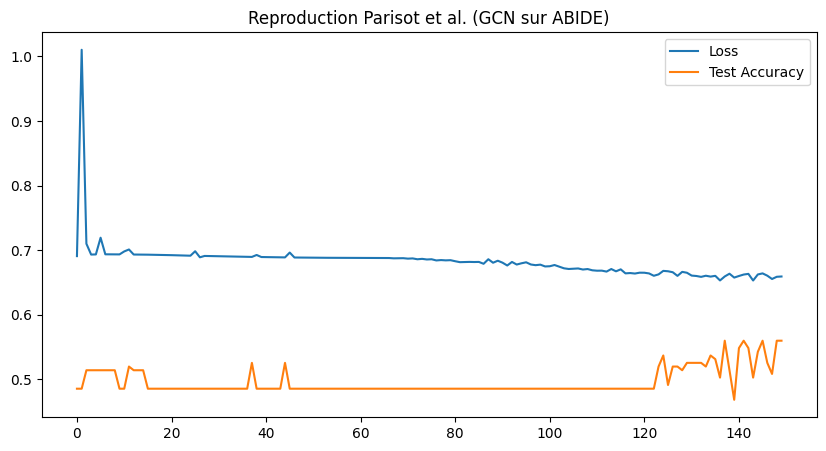

In [18]:
##VERSION AVEC LES DONNÉES DE L'ARTICLE (LA BONNE)
def train():
    model.train()
    optimizer.zero_grad()
    # Note: GCNConv peut prendre edge_weight en 3eme argument si on veut utiliser les poids du graphe
    out = model(data.x, data.edge_index, data.edge_attr)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    out = model(data.x, data.edge_index, data.edge_attr)
    pred = out.argmax(dim=1)

    accs = []
    for mask in [data.train_mask, data.test_mask]:
        correct = pred[mask] == data.y[mask]
        accs.append(int(correct.sum()) / int(mask.sum()))
    return accs

losses = []
test_accs = []

print("Début de l'entraînement...")
for epoch in range(1, 151): # 150 époques comme dans le papier
    loss = train()
    train_acc, test_acc = test()
    losses.append(loss)
    test_accs.append(test_acc)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Visualisation rapide
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.plot(test_accs, label='Test Accuracy')
plt.legend()
plt.title("Reproduction Parisot et al. (GCN sur ABIDE)")
plt.show()

Début de l'entraînement...
Epoch: 010, Loss: 0.6939, Train Acc: 0.4843, Test Acc: 0.5024
Epoch: 020, Loss: 0.6933, Train Acc: 0.4843, Test Acc: 0.5024
Epoch: 030, Loss: 0.6931, Train Acc: 0.5157, Test Acc: 0.4976
Epoch: 040, Loss: 0.6929, Train Acc: 0.5157, Test Acc: 0.4976
Epoch: 050, Loss: 0.6927, Train Acc: 0.5157, Test Acc: 0.4976
Epoch: 060, Loss: 0.6927, Train Acc: 0.5157, Test Acc: 0.4976
Epoch: 070, Loss: 0.6927, Train Acc: 0.5157, Test Acc: 0.4976
Epoch: 080, Loss: 0.6927, Train Acc: 0.5157, Test Acc: 0.4976
Epoch: 090, Loss: 0.6927, Train Acc: 0.5157, Test Acc: 0.4976
Epoch: 100, Loss: 0.6910, Train Acc: 0.5157, Test Acc: 0.4976
Epoch: 110, Loss: 0.6873, Train Acc: 0.5157, Test Acc: 0.4976
Epoch: 120, Loss: 0.6797, Train Acc: 0.5229, Test Acc: 0.5217
Epoch: 130, Loss: 0.6905, Train Acc: 0.5169, Test Acc: 0.5024
Epoch: 140, Loss: 0.6835, Train Acc: 0.5664, Test Acc: 0.5266
Epoch: 150, Loss: 0.6743, Train Acc: 0.5809, Test Acc: 0.5556


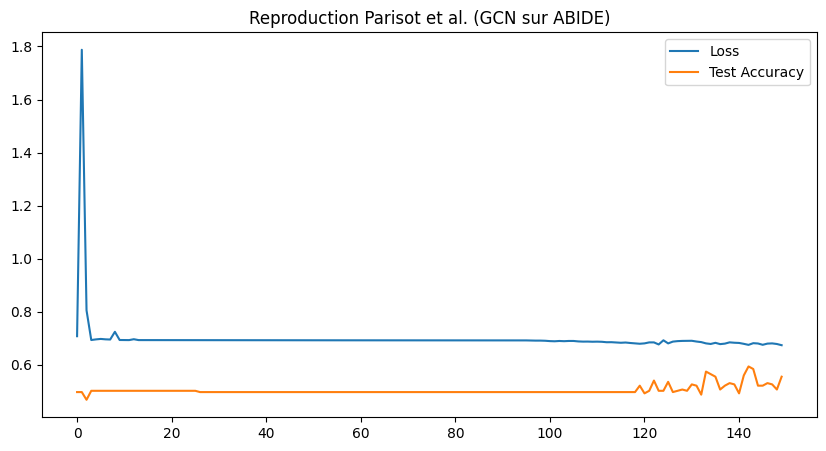

In [17]:
##def train():
##    model.train()
##    optimizer.zero_grad()
##    # Note: GCNConv peut prendre edge_weight en 3eme argument si on veut utiliser les poids du graphe
##    out = model(data.x, data.edge_index, data.edge_attr)
##    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
##    loss.backward()
##    optimizer.step()
##    return loss.item()
##
##def test():
##    model.eval()
##    out = model(data.x, data.edge_index, data.edge_attr)
##    pred = out.argmax(dim=1)
##
##    accs = []
##    for mask in [data.train_mask, data.test_mask]:
##        correct = pred[mask] == data.y[mask]
##        accs.append(int(correct.sum()) / int(mask.sum()))
##    return accs
##
##losses = []
##test_accs = []
##
##print("Début de l'entraînement...")
##for epoch in range(1, 151): # 150 époques comme dans le papier
##    loss = train()
##    train_acc, test_acc = test()
##    losses.append(loss)
##    test_accs.append(test_acc)
##    if epoch % 10 == 0:
##        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
##
### Visualisation rapide
##plt.figure(figsize=(10, 5))
##plt.plot(losses, label='Loss')
##plt.plot(test_accs, label='Test Accuracy')
##plt.legend()
##plt.title("Reproduction Parisot et al. (GCN sur ABIDE)")
##plt.show()

## Préparation de la Validation Croisée (Baseline Ridge)

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import RidgeClassifier

# Configuration
# L'article utilise 10 folds. Pour tester vite, tu peux mettre 3.
# Pour le rapport final, remets 10.
N_SPLITS = 10
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=123)

print(f"--- 1. Baseline: Ridge Classifier ({N_SPLITS}-fold CV) ---")

# On utilise X (features sélectionnées) et y (labels) définis plus haut
clf = RidgeClassifier()
ridge_scores = cross_val_score(clf, X, y, cv=skf)

print(f"Scores par fold : {ridge_scores}")
print(f"MOYENNE RIDGE : {ridge_scores.mean()*100:.2f}% (+/- {ridge_scores.std()*100:.2f})")
print("-----------------------------------------------------")

--- 1. Baseline: Ridge Classifier (10-fold CV) ---
Scores par fold : [0.59090909 0.62068966 0.57471264 0.5862069  0.49425287 0.66666667
 0.65517241 0.63218391 0.59770115 0.66666667]
MOYENNE RIDGE : 60.85% (+/- 4.98)
-----------------------------------------------------


## Fonctions utilitaires pour le GCN

In [20]:
def reset_model(model):
    """Réinitialise les poids du modèle pour repartir à zéro."""
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

def run_gcn_cv(edge_index, edge_attr, X, y, n_splits=10, epochs=150):
    """
    Lance une validation croisée complète pour une structure de graphe donnée.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123)
    scores = []

    # Données PyG globales
    x_tensor = torch.tensor(X, dtype=torch.float).to(device)
    y_tensor = torch.tensor(y, dtype=torch.long).to(device)
    edge_index = edge_index.to(device)
    edge_attr = edge_attr.to(device)

    print(f"Lancement de la CV sur {n_splits} folds...")

    for fold, (train_idx_np, test_idx_np) in enumerate(skf.split(X, y)):
        # 1. Préparation des masques pour ce fold
        train_mask = torch.zeros(len(y), dtype=torch.bool).to(device)
        test_mask = torch.zeros(len(y), dtype=torch.bool).to(device)
        train_mask[train_idx_np] = True
        test_mask[test_idx_np] = True

        # 2. Initialisation d'un nouveau modèle
        model = GCN(num_features=X.shape[1], hidden_channels=16, num_classes=2, dropout=0.3).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

        # 3. Boucle d'entraînement
        model.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            out = model(x_tensor, edge_index, edge_attr)
            loss = F.nll_loss(out[train_mask], y_tensor[train_mask])
            loss.backward()
            optimizer.step()

        # 4. Évaluation
        model.eval()
        out = model(x_tensor, edge_index, edge_attr)
        pred = out.argmax(dim=1)
        correct = pred[test_mask] == y_tensor[test_mask]
        acc = int(correct.sum()) / int(test_mask.sum())
        scores.append(acc)

        print(f"Fold {fold+1}/{n_splits} - Acc: {acc:.4f}")

    return np.array(scores)

## Génération du "Random Graph" (Ablation)

In [21]:
import random
from torch_geometric.utils import to_undirected

def build_random_graph(num_nodes, num_edges_target):
    """
    Construit un graphe aléatoire avec environ la même densité que le graphe réel.
    """
    print(f"Génération d'un graphe aléatoire avec ~{num_edges_target} arêtes...")

    # On génère des paires aléatoires
    # Note: C'est une approximation rapide pour Colab.
    # Pour être précis on utiliserait erdos_renyi_graph de networkx ou torch_geometric

    rows = []
    cols = []

    # On génère num_edges_target arêtes aléatoires
    for _ in range(num_edges_target):
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        if u != v:
            rows.append(u)
            cols.append(v)

    edge_index = torch.tensor([rows, cols], dtype=torch.long)

    # On rend le graphe non-dirigé (symétrique)
    edge_index = to_undirected(edge_index)

    # Poids des arêtes = 1.0 (ou aléatoire, l'article utilise des poids phénotypiques, ici on simplifie pour l'ablation)
    edge_attr = torch.ones(edge_index.shape[1], dtype=torch.float)

    return edge_index, edge_attr

# Calcul du nombre d'arêtes du "VRAI" graphe pour calibrer le faux
num_edges_real = data.edge_index.shape[1] // 2 # Divisé par 2 car non-dirigé
edge_index_random, edge_attr_random = build_random_graph(X.shape[0], num_edges_real)

print("Graphe aléatoire prêt.")

Génération d'un graphe aléatoire avec ~3172 arêtes...
Graphe aléatoire prêt.


#### Plot le graph

Calcul du layout pour Graphe Aléatoire (Ablation)...


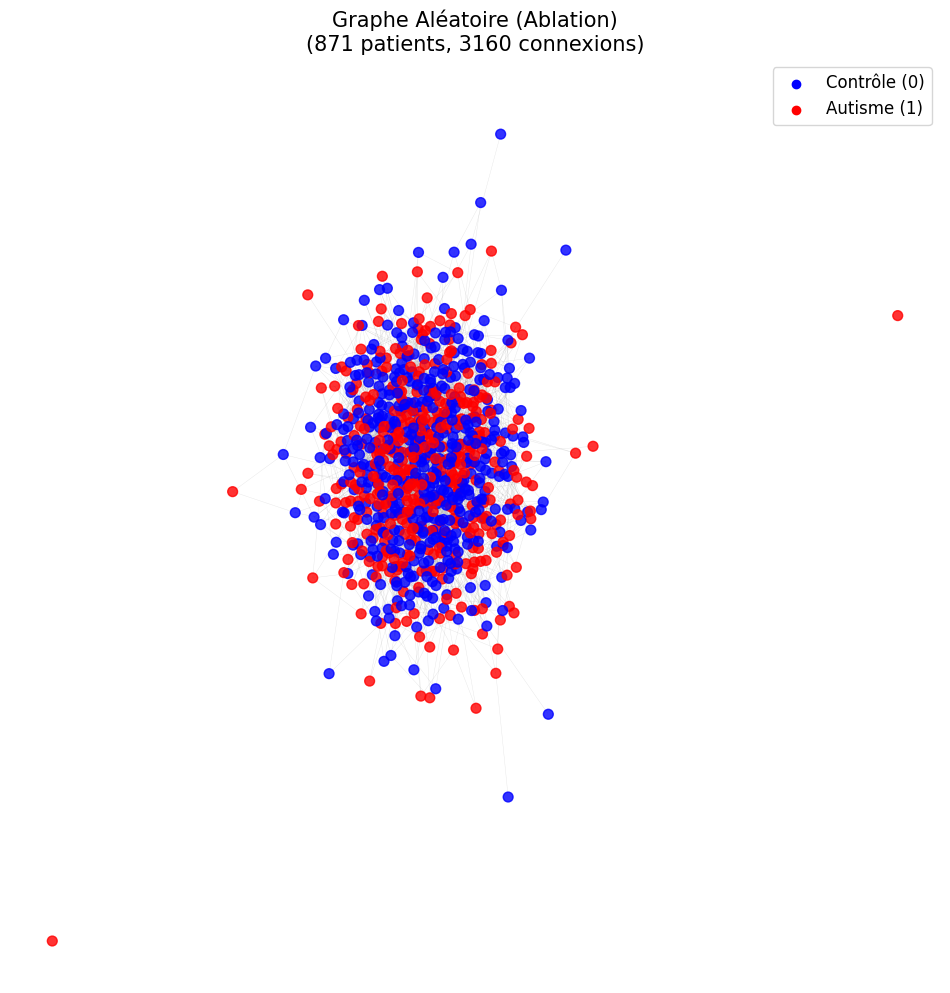

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
from torch_geometric.data import Data

def plot_random_graph_viz(edge_index, y, num_nodes, title="Graphe Aléatoire (Ablation)"):
    plt.figure(figsize=(12, 12))

    # 1. Création d'un objet Data temporaire pour la conversion
    # On n'a pas besoin de 'x' (features) pour le dessin, juste de la structure et des labels
    temp_data = Data(edge_index=edge_index, y=y, num_nodes=num_nodes)

    # 2. Conversion en NetworkX
    G = to_networkx(temp_data, to_undirected=True)

    # 3. Couleurs (Rouge = Autiste, Bleu = Contrôle)
    node_colors = []
    # On s'assure que y est bien un tenseur CPU pour l'itération
    y_cpu = y.cpu() if torch.is_tensor(y) else torch.tensor(y)

    for i in range(num_nodes):
        if y_cpu[i].item() == 1:
            node_colors.append('red')
        else:
            node_colors.append('blue')

    # 4. Dessin
    print(f"Calcul du layout pour {title}...")
    # On utilise spring_layout qui essaie d'écarter les noeuds mais de rapprocher les connectés
    pos = nx.spring_layout(G, seed=42, k=0.15)

    nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, alpha=0.8)
    # Arêtes plus fines et grises pour ne pas surcharger la vue
    nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.2, edge_color='gray')

    # Légende
    plt.scatter([], [], c='blue', label='Contrôle (0)')
    plt.scatter([], [], c='red', label='Autisme (1)')
    plt.legend(fontsize='large')

    plt.title(title + f"\n({num_nodes} patients, {edge_index.shape[1]//2} connexions)", fontsize=15)
    plt.axis('off')
    plt.show()

# --- Lancement de la visualisation ---
# On utilise les variables créées par votre fonction build_random_graph
# X et y doivent être disponibles dans votre notebook (depuis les étapes précédentes)

# On s'assure que y est un tenseur pour la fonction
if not torch.is_tensor(y):
    y_tensor_viz = torch.tensor(y, dtype=torch.long)
else:
    y_tensor_viz = y

plot_random_graph_viz(edge_index_random, y_tensor_viz, X.shape[0])

Calcul du layout pour Graphe Aléatoire (Ablation)...


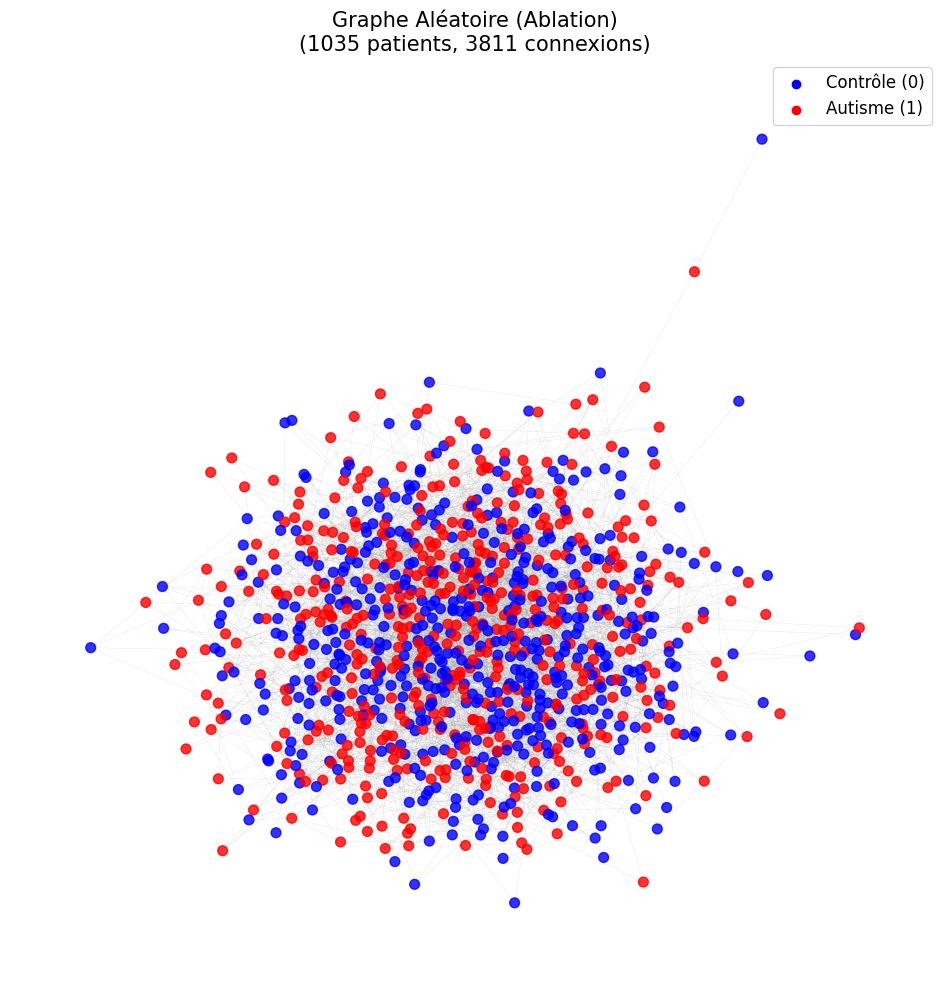

In [21]:
##import networkx as nx
##import matplotlib.pyplot as plt
##from torch_geometric.utils import to_networkx
##from torch_geometric.data import Data
##
##def plot_random_graph_viz(edge_index, y, num_nodes, title="Graphe Aléatoire (Ablation)"):
##    plt.figure(figsize=(12, 12))
##
##    # 1. Création d'un objet Data temporaire pour la conversion
##    # On n'a pas besoin de 'x' (features) pour le dessin, juste de la structure et des labels
##    temp_data = Data(edge_index=edge_index, y=y, num_nodes=num_nodes)
##
##    # 2. Conversion en NetworkX
##    G = to_networkx(temp_data, to_undirected=True)
##
##    # 3. Couleurs (Rouge = Autiste, Bleu = Contrôle)
##    node_colors = []
##    # On s'assure que y est bien un tenseur CPU pour l'itération
##    y_cpu = y.cpu() if torch.is_tensor(y) else torch.tensor(y)
##
##    for i in range(num_nodes):
##        if y_cpu[i].item() == 1:
##            node_colors.append('red')
##        else:
##            node_colors.append('blue')
##
##    # 4. Dessin
##    print(f"Calcul du layout pour {title}...")
##    # On utilise spring_layout qui essaie d'écarter les noeuds mais de rapprocher les connectés
##    pos = nx.spring_layout(G, seed=42, k=0.15)
##
##    nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, alpha=0.8)
##    # Arêtes plus fines et grises pour ne pas surcharger la vue
##    nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.2, edge_color='gray')
##
##    # Légende
##    plt.scatter([], [], c='blue', label='Contrôle (0)')
##    plt.scatter([], [], c='red', label='Autisme (1)')
##    plt.legend(fontsize='large')
##
##    plt.title(title + f"\n({num_nodes} patients, {edge_index.shape[1]//2} connexions)", fontsize=15)
##    plt.axis('off')
##    plt.show()
##
### --- Lancement de la visualisation ---
### On utilise les variables créées par votre fonction build_random_graph
### X et y doivent être disponibles dans votre notebook (depuis les étapes précédentes)
##
### On s'assure que y est un tenseur pour la fonction
##if not torch.is_tensor(y):
##    y_tensor_viz = torch.tensor(y, dtype=torch.long)
##else:
##    y_tensor_viz = y
##
##plot_random_graph_viz(edge_index_random, y_tensor_viz, X.shape[0])

## Exécution de l'Expérience Complète

In [23]:
# --- 2. GCN avec Population Graph (Proposed Method) ---
print(f"\n--- 2. Proposed Method: Population Graph GCN ({N_SPLITS}-fold CV) ---")
# On réutilise edge_index et edge_attr calculés dans la Cellule 3 (Ton "Vrai" graphe)
pop_gcn_scores = run_gcn_cv(data.edge_index, data.edge_attr, X, y, n_splits=N_SPLITS)
print(f"MOYENNE POP-GCN : {pop_gcn_scores.mean()*100:.2f}% (+/- {pop_gcn_scores.std()*100:.2f})")


# --- 3. GCN avec Random Graph (Ablation Study) ---
print(f"\n--- 3. Ablation: Random Graph GCN ({N_SPLITS}-fold CV) ---")
rand_gcn_scores = run_gcn_cv(edge_index_random, edge_attr_random, X, y, n_splits=N_SPLITS)
print(f"MOYENNE RAND-GCN : {rand_gcn_scores.mean()*100:.2f}% (+/- {rand_gcn_scores.std()*100:.2f})")


--- 2. Proposed Method: Population Graph GCN (10-fold CV) ---
Lancement de la CV sur 10 folds...
Fold 1/10 - Acc: 0.5341
Fold 2/10 - Acc: 0.5747
Fold 3/10 - Acc: 0.5402
Fold 4/10 - Acc: 0.5747
Fold 5/10 - Acc: 0.4828
Fold 6/10 - Acc: 0.5172
Fold 7/10 - Acc: 0.6092
Fold 8/10 - Acc: 0.5287
Fold 9/10 - Acc: 0.5287
Fold 10/10 - Acc: 0.5862
MOYENNE POP-GCN : 54.77% (+/- 3.58)

--- 3. Ablation: Random Graph GCN (10-fold CV) ---
Lancement de la CV sur 10 folds...
Fold 1/10 - Acc: 0.4773
Fold 2/10 - Acc: 0.5172
Fold 3/10 - Acc: 0.5287
Fold 4/10 - Acc: 0.5172
Fold 5/10 - Acc: 0.5402
Fold 6/10 - Acc: 0.5402
Fold 7/10 - Acc: 0.5402
Fold 8/10 - Acc: 0.5517
Fold 9/10 - Acc: 0.5632
Fold 10/10 - Acc: 0.5402
MOYENNE RAND-GCN : 53.16% (+/- 2.25)


## Visualisation (Le Graphique du Rapport)

/tmp/ipython-input-1699816514.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)


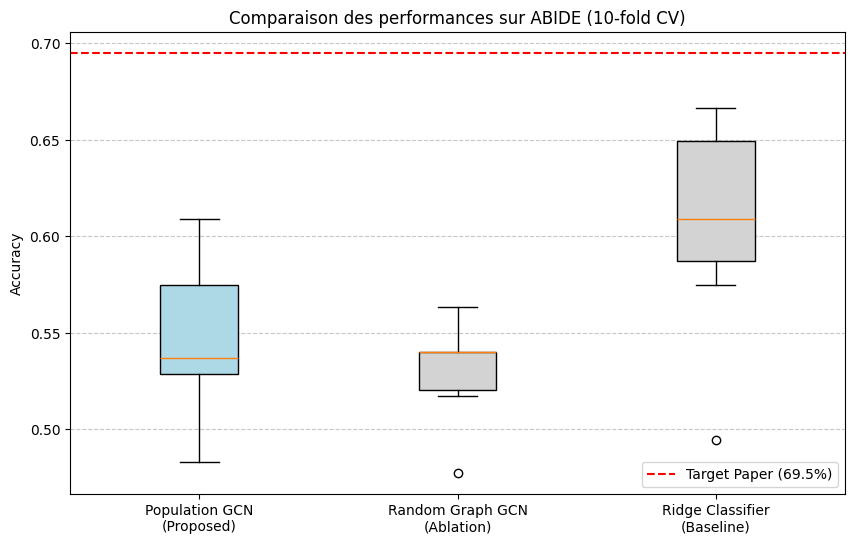

Interprétation :
Si la boîte bleue est au-dessus des grises et proche de la ligne rouge, BRAVO !


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Création des données pour le plot
data_to_plot = [pop_gcn_scores, rand_gcn_scores, ridge_scores]
labels = ['Population GCN\n(Proposed)', 'Random Graph GCN\n(Ablation)', 'Ridge Classifier\n(Baseline)']

# Boxplot
bplot = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)

# Couleurs (Bleu pour le gagnant, Gris/Rouge pour les autres)
colors = ['lightblue', 'lightgrey', 'lightgrey']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title(f'Comparaison des performances sur ABIDE ({N_SPLITS}-fold CV)')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ligne cible de l'article
plt.axhline(y=0.695, color='r', linestyle='--', label='Target Paper (69.5%)')
plt.legend()

plt.show()

print("Interprétation :")
print(f"Si la boîte bleue est au-dessus des grises et proche de la ligne rouge, BRAVO !")

## Ajout de l'AUC

In [25]:
from sklearn.metrics import roc_auc_score

def run_gcn_cv_with_auc(edge_index, edge_attr, X, y, n_splits=10, epochs=150):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123)
    acc_scores = []
    auc_scores = []

    # Données PyG globales
    x_tensor = torch.tensor(X, dtype=torch.float).to(device)
    y_tensor = torch.tensor(y, dtype=torch.long).to(device)
    edge_index = edge_index.to(device)
    edge_attr = edge_attr.to(device)

    print(f"Lancement de la CV (Acc + AUC) sur {n_splits} folds...")

    for fold, (train_idx_np, test_idx_np) in enumerate(skf.split(X, y)):
        # Masques
        train_mask = torch.zeros(len(y), dtype=torch.bool).to(device)
        test_mask = torch.zeros(len(y), dtype=torch.bool).to(device)
        train_mask[train_idx_np] = True
        test_mask[test_idx_np] = True

        # Nouveau modèle
        model = GCN(num_features=X.shape[1], hidden_channels=16, num_classes=2, dropout=0.3).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

        # Entraînement
        model.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            out = model(x_tensor, edge_index, edge_attr)
            loss = F.nll_loss(out[train_mask], y_tensor[train_mask])
            loss.backward()
            optimizer.step()

        # Évaluation
        model.eval()
        with torch.no_grad():
            out = model(x_tensor, edge_index, edge_attr)

            # 1. Accuracy
            pred = out.argmax(dim=1)
            correct = pred[test_mask] == y_tensor[test_mask]
            acc = int(correct.sum()) / int(test_mask.sum())
            acc_scores.append(acc)

            # 2. AUC (Besoin des probabilités pour la classe 1)
            # out est en log_softmax, on prend l'exponentielle pour avoir la proba
            probs = torch.exp(out)[:, 1]
            y_true = y_tensor[test_mask].cpu().numpy()
            y_scores = probs[test_mask].cpu().numpy()

            try:
                auc = roc_auc_score(y_true, y_scores)
                auc_scores.append(auc)
            except ValueError:
                auc_scores.append(0.5) # Cas rare où un fold n'a qu'une seule classe

        if fold % 2 == 0: # Moins de logs
            print(f"Fold {fold+1} - Acc: {acc:.4f}, AUC: {auc:.4f}")

    return np.array(acc_scores), np.array(auc_scores)

In [26]:
# Recalcul de la Baseline avec AUC
print("--- Baseline: Ridge Classifier (Acc + AUC) ---")
ridge_accs = []
ridge_aucs = []

for train_idx, test_idx in skf.split(X, y):
    clf = RidgeClassifier()
    clf.fit(X[train_idx], y[train_idx])

    # Accuracy
    acc = clf.score(X[test_idx], y[test_idx])
    ridge_accs.append(acc)

    # AUC (via decision_function)
    scores = clf.decision_function(X[test_idx])
    auc = roc_auc_score(y[test_idx], scores)
    ridge_aucs.append(auc)

ridge_accs = np.array(ridge_accs)
ridge_aucs = np.array(ridge_aucs)
print(f"Moyenne Ridge - Acc: {ridge_accs.mean():.4f}, AUC: {ridge_aucs.mean():.4f}")

--- Baseline: Ridge Classifier (Acc + AUC) ---
Moyenne Ridge - Acc: 0.6085, AUC: 0.6594


In [27]:
# Proposed Method (Population Graph)
pop_acc, pop_auc = run_gcn_cv_with_auc(data.edge_index, data.edge_attr, X, y, n_splits=N_SPLITS)

# Ablation (Random Graph)
rand_acc, rand_auc = run_gcn_cv_with_auc(edge_index_random, edge_attr_random, X, y, n_splits=N_SPLITS)

Lancement de la CV (Acc + AUC) sur 10 folds...
Fold 1 - Acc: 0.5341, AUC: 0.5000
Fold 3 - Acc: 0.4828, AUC: 0.4783
Fold 5 - Acc: 0.5402, AUC: 0.5814
Fold 7 - Acc: 0.5287, AUC: 0.5766
Fold 9 - Acc: 0.5172, AUC: 0.5378
Lancement de la CV (Acc + AUC) sur 10 folds...
Fold 1 - Acc: 0.5341, AUC: 0.5000
Fold 3 - Acc: 0.5287, AUC: 0.5000
Fold 5 - Acc: 0.5402, AUC: 0.5000
Fold 7 - Acc: 0.5632, AUC: 0.6165
Fold 9 - Acc: 0.5747, AUC: 0.5654


/tmp/ipython-input-2193924042.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = ax1.boxplot(data_acc, patch_artist=True, labels=labels)
/tmp/ipython-input-2193924042.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot2 = ax2.boxplot(data_auc, patch_artist=True, labels=labels)


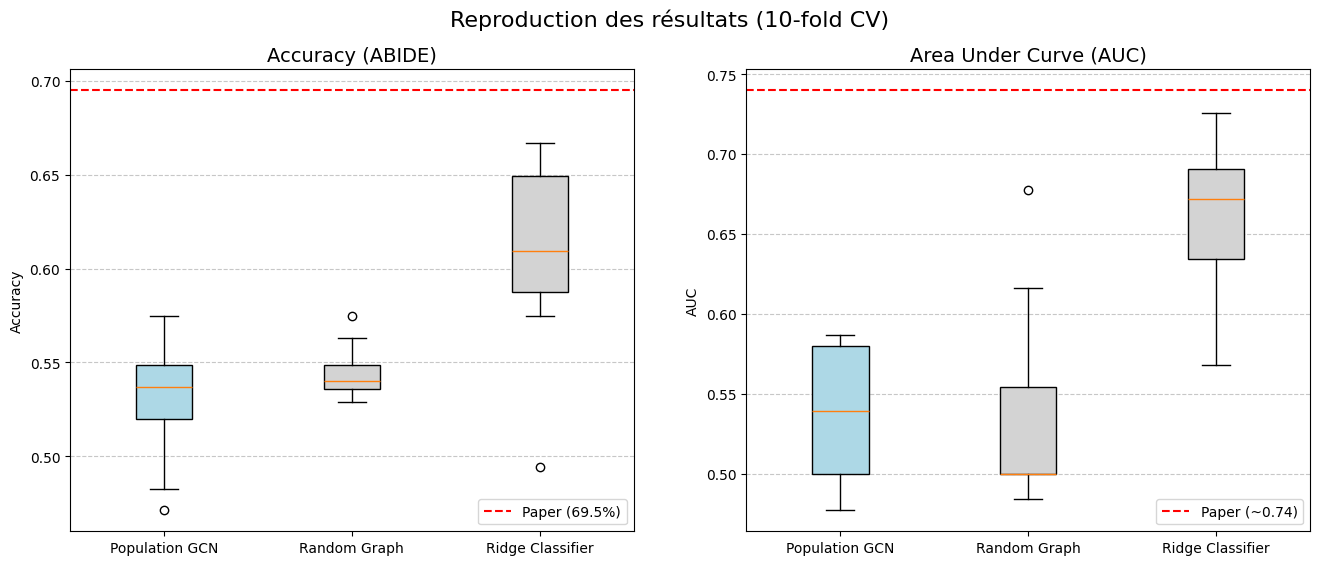

In [28]:
import matplotlib.pyplot as plt

# Configuration des données
data_acc = [pop_acc, rand_acc, ridge_accs]
data_auc = [pop_auc, rand_auc, ridge_aucs]
labels = ['Population GCN', 'Random Graph', 'Ridge Classifier']
colors = ['lightblue', 'lightgrey', 'lightgrey']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1 : Accuracy ---
bplot1 = ax1.boxplot(data_acc, patch_artist=True, labels=labels)
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_title(f'Accuracy (ABIDE)', fontsize=14)
ax1.set_ylabel('Accuracy')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
# Ligne cible article (69.5%)
ax1.axhline(y=0.695, color='r', linestyle='--', label='Paper (69.5%)')
ax1.legend()

# --- Plot 2 : AUC ---
bplot2 = ax2.boxplot(data_auc, patch_artist=True, labels=labels)
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_title(f'Area Under Curve (AUC)', fontsize=14)
ax2.set_ylabel('AUC')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
# Ligne cible article (AUC ~0.70 d'après Fig 2b)
ax2.axhline(y=0.74, color='r', linestyle='--', label='Paper (~0.74)')
ax2.legend()

plt.suptitle(f"Reproduction des résultats ({N_SPLITS}-fold CV)", fontsize=16)
plt.show()